 # PART 1 Dataset Selection and Loading

For this project, we used the *Global Fashion Retail Stores Dataset* from Kaggle, which contains well over 250,000 records at the transactional level. 
This dataset includes detailed point of sale transactions, information on products, stores, customers and discounts, making it suitable for in-depth analysis of sales trends, customer behavior and product performance across multiple dimensions.

Source: https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset

## Environment Setup and Database Initialization

The following commands prepare the analytical environment, reset the database and enable SQL querying within the notebook for the Global Fashion Retail Stores analysis.

%load_ext sql  
Loads the SQL extension so SQL queries can be executed directly inside the Jupyter Notebook.

!dropdb -U student week11  
Deletes the existing week11 PostgreSQL database to ensure a clean starting environment.

!createdb -U student week11  
Creates a new PostgreSQL database named week11 for the project analysis.

%sql postgresql://student@/week11  
Establishes a connection between the notebook and the week11 PostgreSQL database.

!pip install kaggle  
Installs the Kaggle API package to enable downloading the dataset programmatically.

!kaggle datasets download -d ricgomes/global-fashion-retail-stores-dataset  
Downloads the Global Fashion Retail Stores dataset from Kaggle into the working directory as a compressed ZIP file.

!unzip global-fashion-retail-stores-dataset.zip  
Extracts the contents of the downloaded ZIP file so the CSV data files can be accessed for analysis.






In [1]:
%load_ext sql

In [2]:
!dropdb -U student week11

In [3]:
!createdb -U student week11

In [96]:
%sql postgresql://student@/week11

In [5]:
!pip install kaggle



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [6]:
!kaggle datasets download -d ricgomes/global-fashion-retail-stores-dataset

Dataset URL: https://www.kaggle.com/datasets/ricgomes/global-fashion-retail-stores-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 93%|█████████████████████████████████████▎  | 209M/224M [00:02<00:00, 88.3MB/s]
100%|████████████████████████████████████████| 224M/224M [00:02<00:00, 93.5MB/s]


In [7]:
!unzip global-fashion-retail-stores-dataset.zip

Archive:  global-fashion-retail-stores-dataset.zip
replace customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


# PART 2.1  Data Wrangling

!ls *.csv  
Lists all CSV files in the current working directory, confirming which data files are available for analysis.

!wc -l transactions.csv customers.csv discounts.csv employees.csv products.csv stores.csv  
Counts the number of rows in each CSV file to understand dataset size and verify that the transactions table meets the ≥250,000 records requirement.

!csvcut -n   
Displays the column names and their index positions in the transactions file, the customers file, the , helping to understand the structure of the transactional data before loading it into the database.

!head -n 10 transactions.csv  
Displays the first 5 to 10 rows of each csv file to quickly inspect the data format, column order, and sample values before performing data cleaning or database loading.

!sed '/^$/d;s/<br \/>//g' .csv | head | csvlook  
Removes empty rows and HTML line break tags from the csv file, then displays a clean, readable preview of the first few records in table format to verify data quality before loading.

!
Runs a shell (Linux) command from inside the Jupyter notebook instead of Python.

sed
A stream editor used to search, modify, and clean text line-by-line.

'...'
Single quotes tell the shell to treat everything inside as one sed instruction.

/^$/
A regular expression:

^ means the start of a line

$ means the end of a line

Together (^$) they match empty lines

d
The delete command in sed; removes any line that matches /^$/.

;
Separates multiple sed commands in the same instruction.

s/<br \/>//g
A substitution command:

s means substitute

<br \/> is the exact text pattern being removed (HTML line break)

The empty space between the second and third / means replace with nothing

g means global, so remove all occurrences in each line

file.csv
The input file being cleaned and inspected.

|
A pipe that sends the output of one command directly into the next command.

head
Displays only the first 10 lines of the cleaned output for quick inspection.

|
Pipes the preview output to another command.

csvlook
Formats the CSV data into a readable table, making it easier to visually verify column structure and values.




In [6]:
!ls *.csv

2017Q2-capitalbikeshare-tripdata.csv  datapipe.csv	     new_headers.csv
2017Q3-capitalbikeshare-tripdata.csv  discounts.csv	     products.csv
2017Q4-capitalbikeshare-tripdata.csv  employees.csv	     stores.csv
2017q1-4.csv			      header_pipe.csv	     transactions.csv
2017q1.csv			      indiv_header_file.csv
customers.csv			      merged.csv


In [7]:
!wc -l transactions.csv customers.csv discounts.csv employees.csv products.csv stores.csv

   6416828 transactions.csv
   1643307 customers.csv
       182 discounts.csv
       405 employees.csv
     17941 products.csv
        36 stores.csv
   8078699 total


In [8]:
!csvcut -n transactions.csv

  1: Invoice ID
  2: Line
  3: Customer ID
  4: Product ID
  5: Size
  6: Color
  7: Unit Price
  8: Quantity
  9: Date
 10: Discount
 11: Line Total
 12: Store ID
 13: Employee ID
 14: Currency
 15: Currency Symbol
 16: SKU
 17: Transaction Type
 18: Payment Method
 19: Invoice Total


In [9]:
!csvcut -n customers.csv

  1: Customer ID
  2: Name
  3: Email
  4: Telephone
  5: City
  6: Country
  7: Gender
  8: Date Of Birth
  9: Job Title


In [10]:
!csvcut -n products.csv

  1: Product ID
  2: Category
  3: Sub Category
  4: Description PT
  5: Description DE
  6: Description FR
  7: Description ES
  8: Description EN
  9: Description ZH
 10: Color
 11: Sizes
 12: Production Cost


In [11]:
!csvcut -n stores.csv

  1: Store ID
  2: Country
  3: City
  4: Store Name
  5: Number of Employees
  6: ZIP Code
  7: Latitude
  8: Longitude


In [12]:
!csvcut -n employees.csv

  1: Employee ID
  2: Store ID
  3: Name
  4: Position


In [13]:
!csvcut -n discounts.csv

  1: Start
  2: End
  3: Discont
  4: Description
  5: Category
  6: Sub Category


In [14]:
# Show first 5 rows of transactions.csv
!head -n 5 transactions.csv

Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
INV-US-001-03558761,1,47162,485,M,,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,7,USD,$,MASU485-M-,Sale,Cash,126.7
INV-US-001-03558761,2,47162,2779,G,,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,7,USD,$,CHCO2779-G-,Sale,Cash,126.7
INV-US-001-03558761,3,47162,64,M,NEUTRAL,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,7,USD,$,MACO64-M-NEUTRAL,Sale,Cash,126.7
INV-US-001-03558762,1,10142,131,M,BLUE,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,6,USD,$,FECO131-M-BLUE,Sale,Cash,77.0


In [15]:
# Show first 5 rows of customers.csv
!head -n 5 customers.csv

Customer ID,Name,Email,Telephone,City,Country,Gender,Date Of Birth,Job Title
1,Tyler Garcia,tyler.garcia@fake_gmail.com,922.970.2265x47563,New York,United States,M,2003-07-15,
2,Joshua Miller,joshua.miller@fake_gmail.com,+1-958-729-6169,New York,United States,M,2000-06-16,Records manager
3,Alison Marshall DDS,alison.marshall.dds@fake_hotmail.com,+1-645-567-0876x5409,New York,United States,F,2003-07-22,
4,Jeffery Acosta,jeffery.acosta@fake_yahoo.com,212.336.0912x84994,New York,United States,M,1996-11-12,Proofreader


In [16]:
# Show first 5 rows of discounts.csv
!head -n 5 discounts.csv

Start,End,Discont,Description,Category,Sub Category
2020-01-01,2020-01-10,0.4,40% discount during our New Year Winter Sale,Feminine,Coats and Blazers
2020-01-01,2020-01-10,0.4,40% discount during our New Year Winter Sale,Feminine,Sweaters and Knitwear
2020-01-01,2020-01-10,0.4,40% discount during our New Year Winter Sale,Masculine,Coats and Blazers
2020-01-01,2020-01-10,0.4,40% discount during our New Year Winter Sale,Masculine,Sweaters and Sweatshirts


In [17]:
!head -n 5 employees.csv

Employee ID,Store ID,Name,Position
1,1,Stephen Johnson,Store Manager
2,1,Rebecca Myers,Assistant Manager
3,1,Katherine Buchanan,Cashier
4,1,Jessica Hicks,Stock Clerk


In [18]:
!head -n 5 products.csv

Product ID,Category,Sub Category,Description PT,Description DE,Description FR,Description ES,Description EN,Description ZH,Color,Sizes,Production Cost
1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,,S|M|L|XL,10.73
2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,19.55
3,Feminine,Dresses and Jumpsuits,Retrô Tricot Preto Estampado,Black Tricot Gedruckter Tricot,Tricot Imprimé En Tricot Noir,Tricot Negro Tricot Impreso,Black Tricot Printed Tricot,黑色三角形印刷三角形,BLACK,S|M|L|XL,25.59
4,Feminine,Shirts and Blouses,Blusa De Algodão Básica,Basis -Baumwollbluse,Chemisier En Coton De Base,Blusa De Algodón,Basic Cotton Blouse,基本的棉衬衫,,S|M|L|XL,27.62


In [19]:
!head -n 5 stores.csv

Store ID,Country,City,Store Name,Number of Employees,ZIP Code,Latitude,Longitude
1,United States,New York,Store New York,10,10001,40.7128,-74.006
2,United States,Los Angeles,Store Los Angeles,8,90001,34.0522,-118.2437
3,United States,Chicago,Store Chicago,9,60601,41.8781,-87.6298
4,United States,Houston,Store Houston,10,77001,29.7604,-95.3698


In [20]:
!head -n 10 transactions.csv

Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
INV-US-001-03558761,1,47162,485,M,,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,7,USD,$,MASU485-M-,Sale,Cash,126.7
INV-US-001-03558761,2,47162,2779,G,,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,7,USD,$,CHCO2779-G-,Sale,Cash,126.7
INV-US-001-03558761,3,47162,64,M,NEUTRAL,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,7,USD,$,MACO64-M-NEUTRAL,Sale,Cash,126.7
INV-US-001-03558762,1,10142,131,M,BLUE,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,6,USD,$,FECO131-M-BLUE,Sale,Cash,77.0
INV-US-001-03558762,2,10142,716,L,WHITE,26.0,1,2023-01-01 20:04:00,0.0,26.0,1,6,USD,$,MAT-716-L-WHITE,Sale,Cash,77.0
INV-US-001-03558762,3,10142,644,,,9.0,1,2023-01-01 20:04:00,0.0,9.0,1,6,USD,$,MAAC644--,Sale,Cash,77.0
INV-US-001-03558763,1,8286,1395,M,,95.5,1,2023-01-01 20:47:00,0.0,95.5,1,6,USD,$,MASU1395-M-,Sale,Cash,95.5
INV-US-001-03558764,1,1968,1

### Removing the zipped file from the current working directory

In [21]:
!rm global-fashion-retail-stores-dataset.zip

rm: cannot remove 'global-fashion-retail-stores-dataset.zip': No such file or directory


# Cleaning of the dataset: separate files

### Cleaning the Transactions csv

In [22]:
!sed '/^$/d;s/<br \/>//g' transactions.csv | head | csvlook

sed: couldn't write 126 items to stdout: Broken pipe
/home/ubuntu/.python3-venv/lib/python3.12/site-packages/agate/table/from_csv.py:83: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  kwargs['dialect'] = csv.Sniffer().sniff(sample)
| Invoice ID          | Line | Customer ID | Product ID | Size | Color   | Unit Price | Quantity |                Date | Discount | Line Total | Store ID | Employee ID | Currency | Currency Symbol | SKU               | Transaction Type | Payment Method | Invoice Total |
| ------------------- | ---- | ----------- | ---------- | ---- | ------- | ---------- | -------- | ------------------- | -------- | ---------- | -------- | ----------- | -------- | --------------- | ----------------- | ---------------- | -------------- | ------------- |
| INV-US-001-03558761 |    1 |      47,162 |        485 | M    |         |       80.5 |     True | 2023-01-01 15:42:00 |      0.0 |       80.5 |     True |           7 | USD      | $               

In [23]:
!wc -l transactions.csv

6416828 transactions.csv


### Cleaning the Customers csv

In [24]:
!sed '/^$/d;s/<br \/>//g' customers.csv | head | csvlook

sed: couldn't write 106 items to stdout: Broken pipe
/home/ubuntu/.python3-venv/lib/python3.12/site-packages/agate/table/from_csv.py:83: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  kwargs['dialect'] = csv.Sniffer().sniff(sample)
| Customer ID | Name                | Email                                | Telephone             | City     | Country       | Gender | Date Of Birth | Job Title             |
| ----------- | ------------------- | ------------------------------------ | --------------------- | -------- | ------------- | ------ | ------------- | --------------------- |
|           1 | Tyler Garcia        | tyler.garcia@fake_gmail.com          | 922.970.2265x47563    | New York | United States | M      |    2003-07-15 |                       |
|           2 | Joshua Miller       | joshua.miller@fake_gmail.com         | +1-958-729-6169       | New York | United States | M      |    2000-06-16 | Records manager       |
|           3 | Alison Marshall

## Cleaning the Products csv

In [25]:
!sed '/^$/d;s/<br \/>//g' products.csv | head | csvlook

sed: couldn't write 244 items to stdout: Broken pipe
/home/ubuntu/.python3-venv/lib/python3.12/site-packages/agate/table/from_csv.py:83: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  kwargs['dialect'] = csv.Sniffer().sniff(sample)
| Product ID | Category | Sub Category          | Description PT                    | Description DE                    | Description FR                        | Description ES                     | Description EN                    | Description ZH   | Color | Sizes             | Production Cost |
| ---------- | -------- | --------------------- | --------------------------------- | --------------------------------- | ------------------------------------- | ---------------------------------- | --------------------------------- | ---------------- | ----- | ----------------- | --------------- |
|          1 | Feminine | Coats and Blazers     | Esportivo Veludo Verde Com Botões | Sport Samt Sport Mit Knöpfen      | Sports Velvet Spo

### Cleaning the Stores csv

In [26]:
!sed '/^$/d;s/<br \/>//g' stores.csv | head | csvlook

| Store ID | Country       | City        | Store Name        | Number of Employees | ZIP Code | Latitude | Longitude |
| -------- | ------------- | ----------- | ----------------- | ------------------- | -------- | -------- | --------- |
|        1 | United States | New York    | Store New York    |                  10 |   10,001 |  40.713… |  -74.006… |
|        2 | United States | Los Angeles | Store Los Angeles |                   8 |   90,001 |  34.052… | -118.244… |
|        3 | United States | Chicago     | Store Chicago     |                   9 |   60,601 |  41.878… |  -87.630… |
|        4 | United States | Houston     | Store Houston     |                  10 |   77,001 |  29.760… |  -95.370… |
|        5 | United States | Phoenix     | Store Phoenix     |                   9 |   85,001 |  33.448… | -112.074… |
|        6 | 中国            | 上海          | Store 上海          |                   8 |  200,000 |  31.230… |  121.474… |
|        7 | 中国            | 北京          | Store

### Cleaning the Employees csv

In [27]:
!sed '/^$/d;s/<br \/>//g' employees.csv | head | csvlook

| Employee ID | Store ID | Name               | Position          |
| ----------- | -------- | ------------------ | ----------------- |
|           1 |     True | Stephen Johnson    | Store Manager     |
|           2 |     True | Rebecca Myers      | Assistant Manager |
|           3 |     True | Katherine Buchanan | Cashier           |
|           4 |     True | Jessica Hicks      | Stock Clerk       |
|           5 |     True | Ryan Gross         | Sales Associate   |
|           6 |     True | Jeffery Carlson    | Sales Associate   |
|           7 |     True | Melissa Wilson     | Sales Associate   |
|           8 |     True | Edward Hicks       | Sales Associate   |
|           9 |     True | Shari Jordan       | Sales Associate   |


### Cleaning the Discounts csv

In [28]:
!sed '/^$/d;s/<br \/>//g' discounts.csv | head | csvlook

|      Start |        End | Discont | Description                                             | Category  | Sub Category             |
| ---------- | ---------- | ------- | ------------------------------------------------------- | --------- | ------------------------ |
| 2020-01-01 | 2020-01-10 |    0.40 | 40% discount during our New Year Winter Sale            | Feminine  | Coats and Blazers        |
| 2020-01-01 | 2020-01-10 |    0.40 | 40% discount during our New Year Winter Sale            | Feminine  | Sweaters and Knitwear    |
| 2020-01-01 | 2020-01-10 |    0.40 | 40% discount during our New Year Winter Sale            | Masculine | Coats and Blazers        |
| 2020-01-01 | 2020-01-10 |    0.40 | 40% discount during our New Year Winter Sale            | Masculine | Sweaters and Sweatshirts |
| 2020-01-01 | 2020-01-10 |    0.40 | 40% discount during our New Year Winter Sale            | Children  | Coats                    |
| 2020-01-01 | 2020-01-10 |    0.40 | 40% discount duri

In [29]:
!wc -l transactions.csv customers.csv discounts.csv employees.csv products.csv stores.csv

   6416828 transactions.csv
   1643307 customers.csv
       182 discounts.csv
       405 employees.csv
     17941 products.csv
        36 stores.csv
   8078699 total


# PART 2.2 Dimensional Modeling

!head -n 10000 transactions.csv | csvstat

This explanation fits perfectly under a *“Data Wrangling & Validation”* section in our assignment.


!
Executes a Linux shell command from within the Jupyter notebook.

head
A command that outputs the first part of a file.

-n 10000
Specifies the number of lines to display; here it limits the output to the first 10,000 rows instead of the entire file.

transactions.csv
The transactional dataset being inspected.

|
A pipe that sends the output of head directly into the next command.

csvstat
A CSV analysis tool that computes summary statistics such as:

number of rows

number of columns

data types

missing values

min/max values


In [30]:
!head -n 10000 transactions.csv | csvstat

/home/ubuntu/.python3-venv/lib/python3.12/site-packages/agate/table/from_csv.py:83: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  kwargs['dialect'] = csv.Sniffer().sniff(sample)
  1. "Invoice ID"

	Type of data:          Text
	Contains null values:  False
	Non-null values:       9999
	Unique values:         7033
	Longest value:         19 characters
	Most common values:    RET-US-001-03559999 (13x)
	                       RET-US-001-03560919 (9x)
	                       RET-US-001-03562785 (9x)
	                       INV-US-001-03558975 (7x)
	                       INV-US-001-03559027 (7x)

  2. "Line"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       9999
	Unique values:         7
	Smallest value:        1
	Largest value:         7
	Sum:                   15946
	Mean:                  1.595
	Median:                1
	StDev:                 1.169
	Most decimal places:   0
	Most common values:    1 (7047x)
	             

## Creating tables and import

%%sql
DROP TABLE IF EXISTS ;

CREATE TABLE 

%%sql
Executes SQL commands directly from the Jupyter notebook using the active database connection.

DROP TABLE IF EXISTS transactions;
Removes the existing  table if it already exists.
This ensures a clean rebuild of the table structure and prevents conflicts from previous schema versions.

CREATE TABLE  (...)
Defines a new relational table to each table data.
The table structure is designed to capture key attributes eg for transactions such as customers, products, pricing, discounts, store and employee information, payment details and timestamps.

SERIAL
Automatically generates a unique, sequential integer value for each new record.
This removes the need to manually supply IDs and guarantees uniqueness.

PRIMARY KEY
Identifies IDs as the unique identifier for each record in the dimensional files.
It enforces uniqueness and non-nullability, and allows this column to be safely referenced by foreign keys in other tables (such as the fact table transactions).

The chosen data types (e.g., INTEGER, VARCHAR, NUMERIC, TIMESTAMP) ensure:

accurate storage of numeric and monetary values

flexibility for categorical attributes

proper handling of date and time data

NOT NULL constraints are used on essential fields to enforce data integrity, ensuring that every transaction record contains the minimum required information.



In [31]:
%%sql
DROP TABLE IF EXISTS transactions;

CREATE TABLE transactions ( 
    Invoice_ID VARCHAR(19) NOT NULL,
    Line NUMERIC(8) NOT NULL,
    Customer_ID	INTEGER NOT NULL,
    Product_ID	INTEGER NOT NULL,
    Size VARCHAR(4),	
    Color VARCHAR(9),	
    Unit_Price VARCHAR(10) NOT NULL,	
    Quantity VARCHAR(1),	 
    Date TIMESTAMP,
    Discount NUMERIC(2,2),
    Line_Total NUMERIC (5,1),
    Store_ID INTEGER NOT NULL,	
    Employee_ID	INTEGER NOT NULL,
    Currency CHAR(3),	
    Currency_Symbol CHAR(1),	
    SKU VARCHAR(50) NOT NULL,
    Transaction_Type CHAR(6),	
    Payment_Method	VARCHAR(20),
    Invoice_Total NUMERIC(6,2)
)

Running query in 'postgresql://student@/week11'

++
||
++
++

In [32]:
%%sql
DROP TABLE IF EXISTS customers;

CREATE TABLE customers (
    Customer_ID SERIAL PRIMARY KEY,
    Name VARCHAR(50) NOT NULL,
    Email VARCHAR(100) NOT NULL,
    Telephone VARCHAR(50) NOT NULL,
    City VARCHAR(50) NOT NULL,
    Country	VARCHAR(50) NOT NULL,
    Gender CHAR(1) NOT NULL,
    Date_Of_Birth DATE NOT NULL,
    Job_Title VARCHAR(70)
)

Running query in 'postgresql://student@/week11'

++
||
++
++

In [33]:
%%sql
DROP TABLE IF EXISTS stores;

CREATE TABLE stores ( 
    Store_ID SERIAL PRIMARY KEY,
    Country VARCHAR(20) NOT NULL,
    City VARCHAR(30) NOT NULL,
    Store_Name VARCHAR(50) NOT NULL,
    Number_of_Employees NUMERIC(3) NOT NULL,
    ZIP_Code VARCHAR(14) NOT NULL,
    Latitude NUMERIC (8,5) NOT NULL,
    Longitude NUMERIC (10,5) NOT NULL
   )

Running query in 'postgresql://student@/week11'

++
||
++
++

In [34]:
%%sql
DROP TABLE IF EXISTS products;

CREATE TABLE products ( 
    Product_ID SERIAL PRIMARY KEY,
    Category VARCHAR(15) NOT NULL,	
    Sub_Category VARCHAR(500) NOT NULL,
    Description_PT VARCHAR(200),
    Description_DE VARCHAR(200),
    Description_FR VARCHAR(200),
    Description_ES VARCHAR(200),
    Description_EN VARCHAR(200),
    Description_ZH VARCHAR(200),
    Color VARCHAR(50),
    Sizes VARCHAR(50),
    Production_Cost NUMERIC(4,2)
)

Running query in 'postgresql://student@/week11'

++
||
++
++

In [35]:
%%sql
DROP TABLE IF EXISTS employees;

CREATE TABLE employees ( 
    Employee_ID SERIAL PRIMARY KEY,
    Store_ID NUMERIC(2) NOT NULL,
    Name VARCHAR(50) NOT NULL,
    Position VARCHAR(50) NOT NULL
)

Running query in 'postgresql://student@/week11'

++
||
++
++

In [36]:
%%sql
DROP TABLE IF EXISTS discounts;

CREATE TABLE discounts (
   discount_id SERIAL PRIMARY KEY,
    "Start" DATE NOT NULL,
    "End" DATE NOT NULL,
    Discount NUMERIC(3,2) NOT NULL,
    Description VARCHAR(100) NOT NULL,
    Category VARCHAR(50) NULL,
    Sub_Category VARCHAR(50) NULL
)

Running query in 'postgresql://student@/week11'

++
||
++
++

## Data Loading

CODE 1 COMMENTS

COPY
Loads data efficiently from an external file into a database table.
It is optimized for bulk data ingestion and is much faster than inserting rows individually.

 table name
Specifies the target table where the transactional data will be stored.

FROM '/home/ubuntu/filename.csv'
Indicates the file path of the CSV file containing the source data.

CSV
Tells PostgreSQL that the input file is in comma-separated values format.

HEADER
Instructs PostgreSQL to skip the first row of the file because it contains column names rather than data.

CODE 2 COMMENTS

SELECT COUNT(*)
Counts the total number of rows returned by the query.
It is commonly used to verify how many records exist in a table.

FROM table name
Specifies the table being queried.

CODE 3 COMMENTS

SELECT *
Retrieves all columns from the table for inspection.

FROM table name
Specifies the selected table as the data source.

ORDER BY   ASC
Sorts the results in ascending order based on the selected or specified column on a table.

LIMIT 10
Restricts the output to the first 10 rows to allow quick inspection without returning the entire dataset.


In [37]:
%%sql
COPY transactions FROM '/home/ubuntu/transactions.csv'
CSV
HEADER;

Running query in 'postgresql://student@/week11'

6416827 rows affected.

++
||
++
++

In [38]:
%%sql
    
SELECT COUNT(*) FROM transactions;


Running query in 'postgresql://student@/week11'

1 rows affected.

count
6416827


In [39]:
%%sql
SELECT * FROM transactions
ORDER BY employee_id ASC
LIMIT 10 

Running query in 'postgresql://student@/week11'

10 rows affected.

invoice_id,line,customer_id,product_id,size,color,unit_price,quantity,date,discount,line_total,store_id,employee_id,currency,currency_symbol,sku,transaction_type,payment_method,invoice_total
INV-US-001-03558814,3,1350,1873,S,BURGUNDY,46.0,1,2023-01-01 12:31:00,0.40,27.6,1,5,USD,$,FECO1873-S-BURGUNDY,Sale,Credit Card,135.70
INV-US-001-03558823,1,8756,543,P,WHITE,42.5,1,2023-01-01 20:03:00,0.40,25.5,1,5,USD,$,CHCO543-P-WHITE,Sale,Credit Card,25.50
INV-US-001-03558814,1,1350,380,44,None,76.0,1,2023-01-01 12:31:00,0.00,76.0,1,5,USD,$,MAPA380-44-,Sale,Credit Card,135.70
INV-US-001-03558814,2,1350,1635,P,None,53.5,1,2023-01-01 12:31:00,0.40,32.1,1,5,USD,$,CHCO1635-P-,Sale,Credit Card,135.70
INV-US-001-03558790,1,31890,2153,P,BLACK,19.0,1,2023-01-01 17:25:00,0.00,19.0,1,5,USD,$,CHBA2153-P-BLACK,Sale,Credit Card,19.00
INV-US-001-03558818,1,129784,492,P,None,29.5,1,2023-01-01 14:02:00,0.40,17.7,1,5,USD,$,CHSW492-P-,Sale,Credit Card,17.70
INV-US-001-03558798,1,19702,1531,P,NEUTRAL,30.5,1,2023-01-01 20:25:00,0.40,18.3,1,5,USD,$,CHCO1531-P-NEUTRAL,Sale,Credit Card,18.30
INV-US-001-03558805,1,66905,2411,M,None,24.0,1,2023-01-01 14:53:00,0.00,24.0,1,5,USD,$,MAUN2411-M-,Sale,Credit Card,24.00
INV-US-001-03558782,1,20085,270,M,None,21.0,1,2023-01-01 20:38:00,0.00,21.0,1,5,USD,$,FELI270-M-,Sale,Cash,21.00
INV-US-001-03558838,1,49638,168,M,RED,37.5,1,2023-01-01 10:40:00,0.40,22.5,1,5,USD,$,MACO168-M-RED,Sale,Credit Card,22.50


In [40]:
%%sql
COPY customers FROM '/home/ubuntu/customers.csv'
CSV
HEADER;

Running query in 'postgresql://student@/week11'

1643306 rows affected.

++
||
++
++

In [41]:
%%sql
SELECT * FROM customers
LIMIT 10

Running query in 'postgresql://student@/week11'

10 rows affected.

customer_id,name,email,telephone,city,country,gender,date_of_birth,job_title
1,Tyler Garcia,tyler.garcia@fake_gmail.com,922.970.2265x47563,New York,United States,M,2003-07-15,None
2,Joshua Miller,joshua.miller@fake_gmail.com,+1-958-729-6169,New York,United States,M,2000-06-16,Records manager
3,Alison Marshall DDS,alison.marshall.dds@fake_hotmail.com,+1-645-567-0876x5409,New York,United States,F,2003-07-22,None
4,Jeffery Acosta,jeffery.acosta@fake_yahoo.com,212.336.0912x84994,New York,United States,M,1996-11-12,Proofreader
5,Ashley Sanders,ashley.sanders@fake_hotmail.com,7814535781,New York,United States,F,1998-02-10,Exercise physiologist
6,Steven Chavez,steven.chavez@fake_yahoo.com,469.238.0828,New York,United States,M,1988-01-06,Technical brewer
7,Steven Snyder,steven.snyder@fake_gmail.com,+1-294-543-6438,New York,United States,M,2000-10-27,Agricultural engineer
8,Paul Walker,paul.walker@fake_hotmail.com,205.335.5074x1759,New York,United States,M,2007-03-03,None
9,Edwin Bryant,edwin.bryant@fake_hotmail.com,+1-436-359-4105x40651,New York,United States,M,1999-07-19,"Biochemist, clinical"
10,Michelle Bird,michelle.bird@fake_gmail.com,+1-325-528-1530x02284,New York,United States,F,2003-03-03,None


## Change of the language for customers and stores

After reviewing the data in the tables we found out that China and Chinese cities are named in Chinese language. For the subsequent analysis we need to change the names from Chinese to English language.

In [42]:
%%sql
SELECT COUNT(*) AS rows_with_china
FROM customers
WHERE country = '中国';


Running query in 'postgresql://student@/week11'

1 rows affected.

rows_with_china
340082


In [43]:
%%sql
SELECT *
FROM customers
WHERE country = '中国';


Running query in 'postgresql://student@/week11'

340082 rows affected.

customer_id,name,email,telephone,city,country,gender,date_of_birth,job_title
385420,陈浩,陈浩@fake_hotmail.com,14588641469,上海,中国,F,2006-07-02,None
385421,张婷,张婷@fake_hotmail.com,18816830636,上海,中国,M,1967-11-08,"Secretary, company"
385422,廖娜,廖娜@fake_hotmail.com,15726671773,上海,中国,M,1968-02-10,"Engineer, technical sales"
385423,周兵,周兵@fake_yahoo.com,13735051596,上海,中国,M,2005-06-19,None
385424,傅慧,傅慧@fake_yahoo.com,18577760729,上海,中国,M,1966-08-30,"Engineer, land"
385425,郑兰英,郑兰英@fake_hotmail.com,18671493170,上海,中国,M,2002-10-19,None
385426,黄红梅,黄红梅@fake_gmail.com,15043802092,上海,中国,M,2004-01-30,None
385427,杨丽丽,杨丽丽@fake_gmail.com,13678304847,上海,中国,M,2006-09-03,None
385428,张宁,张宁@fake_hotmail.com,15790390240,上海,中国,M,2004-09-30,None
385429,刘建,刘建@fake_yahoo.com,13648827273,上海,中国,F,2005-04-27,None


In [44]:
%%sql

SELECT city, COUNT(*) AS rows
FROM customers
WHERE country = '中国'
GROUP BY city;


Running query in 'postgresql://student@/week11'

100 rows affected.

city,rows
万州,1374
上海,42381
东莞,3550
中山,3412
丰台,2199
乐山,1076
佛山,1924
保定,2084
北京,51163
南山,1718


In [45]:
%%sql
    
UPDATE customers
SET city = CASE city
    WHEN '万州' THEN 'Wanzhou'
    WHEN '上海' THEN 'Shanghai'
    WHEN '东莞' THEN 'Dongguan'
    WHEN '中山' THEN 'Zhongshan'
    WHEN '丰台' THEN 'Fengtai'
    WHEN '乐山' THEN 'Leshan'
    WHEN '佛山' THEN 'Foshan'
    WHEN '保定' THEN 'Baoding'
    WHEN '北京' THEN 'Beijing'
    WHEN '南山' THEN 'Nanshan'
    ELSE city
END
WHERE country = '中国';

Running query in 'postgresql://student@/week11'

340082 rows affected.

++
||
++
++

In [46]:
%%sql

SELECT city, COUNT(*) AS rows
FROM customers
WHERE country = '中国'
GROUP BY city;

Running query in 'postgresql://student@/week11'

100 rows affected.

city,rows
Baoding,2084
Beijing,51163
Dongguan,3550
Fengtai,2199
Foshan,1924
Leshan,1076
Nanshan,1718
Shanghai,42381
Wanzhou,1374
Zhongshan,3412


In [47]:
%%sql
UPDATE customers
SET country = 'China'
WHERE country = '中国';

Running query in 'postgresql://student@/week11'

340082 rows affected.

++
||
++
++

In [48]:
%%sql
COPY stores FROM '/home/ubuntu/stores.csv'
CSV
HEADER;

Running query in 'postgresql://student@/week11'

35 rows affected.

++
||
++
++

In [49]:
%%sql
SELECT * FROM stores
LIMIT 10

Running query in 'postgresql://student@/week11'

10 rows affected.

store_id,country,city,store_name,number_of_employees,zip_code,latitude,longitude
1,United States,New York,Store New York,10,10001,40.71280,-74.00600
2,United States,Los Angeles,Store Los Angeles,8,90001,34.05220,-118.24370
3,United States,Chicago,Store Chicago,9,60601,41.87810,-87.62980
4,United States,Houston,Store Houston,10,77001,29.76040,-95.36980
5,United States,Phoenix,Store Phoenix,9,85001,33.44840,-112.07400
6,中国,上海,Store 上海,8,200000,31.23040,121.47370
7,中国,北京,Store 北京,10,100000,39.90420,116.40740
8,中国,广州,Store 广州,10,510000,23.12910,113.26440
9,中国,深圳,Store 深圳,9,518000,22.54290,114.05960
10,中国,重庆,Store 重庆,10,400000,29.56380,106.55050


In [50]:
%%sql

SELECT city, COUNT(*) AS rows
FROM stores
WHERE country = '中国'
GROUP BY city;


Running query in 'postgresql://student@/week11'

5 rows affected.

city,rows
上海,1
北京,1
广州,1
深圳,1
重庆,1


In [51]:
%%sql
    
UPDATE stores
SET city = CASE city
    WHEN '万州' THEN 'Wanzhou'
    WHEN '上海' THEN 'Shanghai'
    WHEN '东莞' THEN 'Dongguan'
    WHEN '中山' THEN 'Zhongshan'
    WHEN '丰台' THEN 'Fengtai'
    WHEN '乐山' THEN 'Leshan'
    WHEN '佛山' THEN 'Foshan'
    WHEN '保定' THEN 'Baoding'
    WHEN '北京' THEN 'Beijing'
    WHEN '南山' THEN 'Nanshan'
    ELSE city
END
WHERE country = '中国';

Running query in 'postgresql://student@/week11'

5 rows affected.

++
||
++
++

In [52]:
%%sql
UPDATE stores
SET country = 'China'
WHERE country = '中国';

Running query in 'postgresql://student@/week11'

5 rows affected.

++
||
++
++

In [53]:
%%sql
COPY products FROM '/home/ubuntu/products.csv'
CSV
HEADER;

Running query in 'postgresql://student@/week11'

17940 rows affected.

++
||
++
++

In [54]:
%%sql
SELECT * FROM products
LIMIT 10

Running query in 'postgresql://student@/week11'

10 rows affected.

product_id,category,sub_category,description_pt,description_de,description_fr,description_es,description_en,description_zh,color,sizes,production_cost
1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,None,S|M|L|XL,10.73
2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,19.55
3,Feminine,Dresses and Jumpsuits,Retrô Tricot Preto Estampado,Black Tricot Gedruckter Tricot,Tricot Imprimé En Tricot Noir,Tricot Negro Tricot Impreso,Black Tricot Printed Tricot,黑色三角形印刷三角形,BLACK,S|M|L|XL,25.59
4,Feminine,Shirts and Blouses,Blusa De Algodão Básica,Basis -Baumwollbluse,Chemisier En Coton De Base,Blusa De Algodón,Basic Cotton Blouse,基本的棉衬衫,None,S|M|L|XL,27.62
5,Feminine,T-shirts and Tops,T-Shirt Básica De Algodão,Basis-Baumwoll-T-Shirt,T-Shirt En Coton De Base,Camiseta Básica De Algodón,Basic Cotton T-Shirt,基本棉T恤,None,S|M|L,11.69
6,Feminine,Pants and Jeans,Calça Jeans Skinny Feminina,Weibliche Röhrenjeans,Jean Skinny Femelle,Jeans Flacos Femeninos,Female Skinny Jeans,女性紧身牛仔裤,None,36|38|40|42|44|46,6.70
7,Feminine,Skirts and Shorts,Saia Midi Plissada Feminina,Midi Plissada Frauenrock,Jupe Féminine Midi Plissada,Falda De Mujeres Midi Plissada,Midi Plissada Women Skirt,Midi Plissada女裙子,None,S|M|L,9.11
8,Feminine,Suits and Sets,Conjunto De Blusa E Saia Midi,Midi Bluse Und Rockset,Jeu De Chemisier Midi Et De Jupe,Midi Blusa Y Falda Set,Midi Blouse And Skirt Set,Midi衬衫和裙子套装,None,S|M|L,14.37
9,Feminine,Sportswear,Conjunto De Moletom Feminino,Damen -Sweatshirt -Set,Sweat-Shirt Pour Femmes,Juego De Sudadera Para Mujeres,Women'S Sweatshirt Set,女子运动衫套装,None,S|M|L|XL,29.04
10,Feminine,Lingerie and Pajamas,Sutiã De Renda Com Bojo,Skizzieren,Esquisser,Bosquejo,Sketch,草图,None,S|M|L|XL,16.50


In [55]:
%%sql
COPY employees FROM '/home/ubuntu/employees.csv'
CSV
HEADER;

Running query in 'postgresql://student@/week11'

404 rows affected.

++
||
++
++

In [56]:
%%sql
SELECT * FROM employees
LIMIT 10

Running query in 'postgresql://student@/week11'

10 rows affected.

employee_id,store_id,name,position
1,1,Stephen Johnson,Store Manager
2,1,Rebecca Myers,Assistant Manager
3,1,Katherine Buchanan,Cashier
4,1,Jessica Hicks,Stock Clerk
5,1,Ryan Gross,Sales Associate
6,1,Jeffery Carlson,Sales Associate
7,1,Melissa Wilson,Sales Associate
8,1,Edward Hicks,Sales Associate
9,1,Shari Jordan,Sales Associate
10,1,Mrs. Melissa Caldwell DDS,Sales Associate


In [57]:
%%sql

COPY discounts ("Start", "End", discount, description, category, sub_category)
FROM '/home/ubuntu/discounts.csv'
CSV
HEADER;



Running query in 'postgresql://student@/week11'

181 rows affected.

++
||
++
++

In [58]:
%%sql
SELECT COUNT(*) FROM discounts;


Running query in 'postgresql://student@/week11'

1 rows affected.

count
181


In [59]:
%%sql
SELECT * FROM discounts
LIMIT 10

Running query in 'postgresql://student@/week11'

10 rows affected.

discount_id,Start,End,discount,description,category,sub_category
1,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Feminine,Coats and Blazers
2,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Feminine,Sweaters and Knitwear
3,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Masculine,Coats and Blazers
4,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Masculine,Sweaters and Sweatshirts
5,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Children,Coats
6,2020-01-01,2020-01-10,0.40,40% discount during our New Year Winter Sale,Children,Sweaters
7,2020-03-15,2020-03-31,0.35,35% discount during our Early Spring Collection Refresh,Feminine,Dresses and Jumpsuits
8,2020-03-15,2020-03-31,0.35,35% discount during our Early Spring Collection Refresh,Feminine,Shirts and Blouses
9,2020-03-15,2020-03-31,0.35,35% discount during our Early Spring Collection Refresh,Masculine,T-shirts and Polos
10,2020-03-15,2020-03-31,0.35,35% discount during our Early Spring Collection Refresh,Masculine,Shirts


## More ETL with SQL

from IPython.display import Image  
Imports the Image class, which allows images to be displayed directly inside a Jupyter Notebook.

Image(url=link)  
Displays an image hosted online by fetching it from the provided URL and rendering it inline within the notebook.





In [60]:
from IPython.display import Image
Image(url="https://github.com/ramin29/Photo/blob/main/WhatsApp%20Image%202025-12-11%20at%2000.01.06_1a6a11b7.jpg?raw=true")  

In [61]:
from IPython.display import Image
Image(url="https://github.com/ramin29/Photo/blob/main/WhatsApp%20Image%202025-12-11.jpg?raw=true")  

# Work on Dimensions, modify fact and link them together

%%sql

SELECT DISTINCT column_name
FROM transactions
ORDER BY column_name
LIMIT 10;


SELECT DISTINCT
Retrieves only unique values, removing duplicate entries from the result set.

column_name
Represents the column being examined for uniqueness (for example, customer IDs, product IDs, or employee IDs).

FROM transactions
Specifies the transactions table as the data source.

ORDER BY column_name
Sorts the distinct values in ascending order to make patterns and ranges easier to inspect.

LIMIT 10
Restricts the output to a small sample of results for quick inspection without scanning the full dataset.


The code establishes a relationship between transactions and discounts, enabling accurate analysis of discount usage and its impact on sales while maintaining data integrity across tables.

ALTER TABLE transactions
Modifies the existing transactions table without recreating it.

ADD COLUMN discount_id INTEGER
Adds a new column to store the identifier of the discount applied to each transaction.
This allows transactions to be linked to discount details stored in a separate table.

ADD CONSTRAINT fk_discounts
Creates a named foreign key constraint to enforce relational integrity.

FOREIGN KEY (discount_id)
Specifies that the discount_id column in the transactions table is a foreign key.

REFERENCES discounts (discount_id)
Links the foreign key to the primary key in the discounts table, ensuring that only valid discounts can be associated with transactions.
                                                                      
The code  is used to assign the correct discount identifier to each transaction by matching discount rates and product attributes, enabling accurate tracking and analysis of discount usage and effectiveness across products.

UPDATE transactions t
Updates records in the transactions table using an alias for readability.

SET discount_id = d.discount_id
Populates the discount_id column by assigning the matching discount identifier from the discounts table.

FROM discounts d, products p
Brings in the discounts and products tables to provide the reference data needed for matching discounts to transactions.

p.product_id = t.product_id
Links each transaction to its corresponding product.

t.discount = d.discount
Matches transactions to discounts based on the discount rate applied.

p.category = d.category
Ensures the discount corresponds to the correct product category.

p.sub_category = d.sub_category
Further refines the match to the correct product sub-category.


In [62]:
%%sql

SELECT DISTINCT customer_id
FROM transactions
ORDER BY customer_id
LIMIT 10;


Running query in 'postgresql://student@/week11'

10 rows affected.

customer_id
1
2
3
4
5
6
7
8
9
10


In [63]:
%%sql

SELECT DISTINCT store_id
FROM transactions
ORDER BY store_id
LIMIT 10;

Running query in 'postgresql://student@/week11'

10 rows affected.

store_id
1
2
3
4
5
6
7
8
9
10


In [64]:
%%sql

SELECT DISTINCT product_id
FROM transactions
ORDER BY product_id
LIMIT 10;

Running query in 'postgresql://student@/week11'

10 rows affected.

product_id
1
2
3
4
5
6
7
8
9
10


In [65]:
%%sql

SELECT DISTINCT employee_id
FROM transactions
ORDER BY employee_id
LIMIT 10;

Running query in 'postgresql://student@/week11'

10 rows affected.

employee_id
5
6
7
8
9
10
11
12
13
18


In [66]:
%%sql
ALTER TABLE transactions
ADD COLUMN discount_id INTEGER,
ADD CONSTRAINT fk_discounts
    FOREIGN KEY (discount_id)
    REFERENCES discounts (discount_id);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [67]:
%%sql
UPDATE transactions t
SET discount_id = d.discount_id
FROM discounts d, products p
WHERE p.product_id = t.product_id
  AND t.discount = d.discount
  AND p.category = d.category
  AND p.sub_category = d.sub_category;



Running query in 'postgresql://student@/week11'

854995 rows affected.

++
||
++
++

In [68]:
%%sql
SELECT * FROM transactions
ORDER BY discount_id DESC
LIMIT 10

Running query in 'postgresql://student@/week11'

10 rows affected.

invoice_id,line,customer_id,product_id,size,color,unit_price,quantity,date,discount,line_total,store_id,employee_id,currency,currency_symbol,sku,transaction_type,payment_method,invoice_total,discount_id
INV-US-001-03558762,2,10142,716,L,WHITE,26.0,1,2023-01-01 20:04:00,0.00,26.0,1,6,USD,$,MAT-716-L-WHITE,Sale,Cash,77.00,None
INV-US-001-03558762,3,10142,644,None,None,9.0,1,2023-01-01 20:04:00,0.00,9.0,1,6,USD,$,MAAC644--,Sale,Cash,77.00,None
INV-US-001-03558763,1,8286,1395,M,None,95.5,1,2023-01-01 20:47:00,0.00,95.5,1,6,USD,$,MASU1395-M-,Sale,Cash,95.50,None
INV-US-001-03558766,1,18139,2147,M,None,16.0,1,2023-01-01 10:57:00,0.00,16.0,1,12,USD,$,MASH2147-M-,Sale,Credit Card,16.00,None
INV-US-001-03558768,1,64777,951,M,None,17.0,1,2023-01-01 19:08:00,0.00,17.0,1,7,USD,$,MASH951-M-,Sale,Credit Card,17.00,None
RET-US-001-03558764,1,1968,1208,M,SILVER,75.0,1,2023-01-01 00:00:00,0.00,-45.0,1,9,USD,$,MACO1208-M-SILVER,Return,Credit Card,-72.30,None
RET-US-001-03558764,2,1968,2639,M,WHITE,45.5,1,2023-01-01 00:00:00,0.00,-27.3,1,9,USD,$,MASW2639-M-WHITE,Return,Credit Card,-72.30,None
INV-US-001-03558773,2,62769,264,L,None,39.0,1,2023-01-01 19:37:00,0.00,39.0,1,12,USD,$,FESH264-L-,Sale,Cash,122.60,None
INV-US-001-03558773,3,62769,2954,38,None,47.0,1,2023-01-01 19:37:00,0.00,47.0,1,12,USD,$,MAPA2954-38-,Sale,Cash,122.60,None
INV-US-001-03558761,1,47162,485,M,None,80.5,1,2023-01-01 15:42:00,0.00,80.5,1,7,USD,$,MASU485-M-,Sale,Cash,126.70,None


COMMENT FOR THE BELOW CODE 

SELECT t.*
Retrieves all columns for each qualifying transaction record.

FROM transactions t
Specifies the transactions table as the data source and assigns it an alias for clarity.

WHERE t.discount_id IS NOT NULL
Filters the results to include only transactions where a discount has been applied and successfully linked to the discounts table.

LIMIT 50
Restricts the output to the first 50 records for quick inspection.

In [69]:
%%sql
SELECT t.*
FROM transactions t
WHERE t.discount_id IS NOT NULL
LIMIT 50;


Running query in 'postgresql://student@/week11'

50 rows affected.

invoice_id,line,customer_id,product_id,size,color,unit_price,quantity,date,discount,line_total,store_id,employee_id,currency,currency_symbol,sku,transaction_type,payment_method,invoice_total,discount_id
INV-US-001-03582618,1,31672,4424,L,None,35.5,1,2023-03-19 17:01:00,0.35,23.1,1,7,USD,$,FESH4424-L-,Sale,Cash,23.07,178
INV-US-001-03584274,1,17024,5724,M,None,34.5,1,2023-03-22 20:42:00,0.35,22.4,1,12,USD,$,FESH5724-M-,Sale,Cash,22.43,178
INV-US-001-03585920,3,75209,4773,M,None,27.0,1,2023-03-25 09:51:00,0.35,17.6,1,11,USD,$,MASH4773-M-,Sale,Cash,133.55,180
INV-US-001-03602698,1,3584,5642,None,None,17.0,3,2023-05-11 20:22:00,0.25,38.3,1,7,USD,$,CHAC5642--,Sale,Cash,38.25,155
INV-US-001-03630351,1,50527,8543,XXL,None,23.5,1,2023-09-01 12:31:00,0.45,12.9,1,7,USD,$,MASH8543-XXL-,Sale,Cash,12.93,159
INV-US-001-03634033,2,299089,8752,38,None,96.5,1,2023-09-04 10:54:00,0.45,53.1,1,8,USD,$,MAPA8752-38-,Sale,Cash,394.07,160
INV-US-001-03636149,1,18904,7570,XL,None,48.5,1,2023-09-08 11:11:00,0.45,26.7,1,7,USD,$,FESH7570-XL-,Sale,Cash,26.68,157
INV-US-001-03638018,1,7545,6958,38,None,67.0,1,2023-09-10 19:37:00,0.45,36.9,1,10,USD,$,MAPA6958-38-,Sale,Cash,36.85,160
INV-US-001-03638299,1,16864,8335,XL,None,30.0,1,2023-09-10 20:34:00,0.45,16.5,1,8,USD,$,MASH8335-XL-,Sale,Cash,16.50,159
INV-US-001-03639089,1,20070,7945,M,None,33.5,1,2023-09-11 13:31:00,0.45,18.4,1,8,USD,$,MASH7945-M-,Sale,Cash,18.43,159


COMMENT FOR THE BELOW CODE 

ALTER TABLE transactions
Modifies the structure of the existing fact table.

ADD CONSTRAINT
Adds a named constraint to formally define a relationship between tables.

FOREIGN KEY (dimension_id)
Designates a column in the fact table as a foreign key used to reference a related dimension.

REFERENCES dimension_table (dimension_id)
Establishes a relationship between the fact table and a corresponding dimension table, allowing transactional records to be linked to descriptive attributes stored separately.

In [70]:
%%sql
    
ALTER TABLE transactions
ADD CONSTRAINT fk_employees
FOREIGN KEY (employee_id)
REFERENCES employees (employee_id);


Running query in 'postgresql://student@/week11'

++
||
++
++

In [71]:
%%sql
    
ALTER TABLE transactions
ADD CONSTRAINT fk_customers
FOREIGN KEY (customer_id)
REFERENCES customers (customer_id);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [72]:
%%sql
    
ALTER TABLE transactions
ADD CONSTRAINT fk_products
FOREIGN KEY (product_id)
REFERENCES products (product_id);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [73]:
%%sql
    
ALTER TABLE transactions
ADD CONSTRAINT fk_stores
FOREIGN KEY (store_id)
REFERENCES stores (store_id);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [74]:
%%sql
SELECT * FROM transactions
LIMIT 10

Running query in 'postgresql://student@/week11'

10 rows affected.

invoice_id,line,customer_id,product_id,size,color,unit_price,quantity,date,discount,line_total,store_id,employee_id,currency,currency_symbol,sku,transaction_type,payment_method,invoice_total,discount_id
INV-US-002-01806498,3,94065,5531,XL,None,36.0,1,2023-03-19 19:01:00,0.00,36.0,2,24,USD,$,MAUN5531-XL-,Sale,Credit Card,227.50,None
INV-US-002-01806498,6,94065,5810,M,NEUTRAL,74.5,1,2023-03-19 19:01:00,0.00,74.5,2,24,USD,$,MACO5810-M-NEUTRAL,Sale,Credit Card,227.50,None
INV-US-002-01806501,2,101134,5417,M,None,53.5,1,2023-03-19 20:11:00,0.00,53.5,2,21,USD,$,FESP5417-M-,Sale,Credit Card,75.60,None
INV-US-002-01806502,1,94769,5836,XXL,GREEN,44.5,1,2023-03-19 19:24:00,0.00,44.5,2,22,USD,$,MACO5836-XXL-GREEN,Sale,Credit Card,44.50,None
INV-US-002-01806504,1,107548,3601,XL,RED,49.5,1,2023-03-19 14:21:00,0.00,49.5,2,23,USD,$,MASW3601-XL-RED,Sale,Cash,49.50,None
INV-US-002-01806505,1,113172,5025,S,None,34.5,1,2023-03-19 19:13:00,0.00,34.5,2,20,USD,$,FESK5025-S-,Sale,Credit Card,153.75,None
INV-US-002-01806505,3,113172,4542,M,None,51.0,1,2023-03-19 19:13:00,0.00,51.0,2,20,USD,$,MASP4542-M-,Sale,Credit Card,153.75,None
INV-US-002-01806507,2,121188,5770,M,None,34.5,1,2023-03-19 20:38:00,0.00,34.5,2,24,USD,$,CHSW5770-M-,Sale,Credit Card,132.33,None
INV-US-002-01806512,1,110847,4915,M,MUSTARD,80.5,1,2023-03-19 12:56:00,0.00,80.5,2,18,USD,$,FECO4915-M-MUSTARD,Sale,Cash,80.50,None
INV-US-002-01806513,1,80097,3542,36,None,55.5,1,2023-03-19 14:48:00,0.00,55.5,2,21,USD,$,FEPA3542-36-,Sale,Credit Card,55.50,None


## COMMENTS FOR TIME CODES

Code: SELECT DISTINCT … FROM transactions LIMIT 10;
This query extracts unique timestamp values from the transactions table and derives multiple time attributes (hour, day, month, weekday, quarter) to prepare data for building a time (hour/date) dimension.

Code: DROP TABLE IF EXISTS Hour;
This statement deletes the existing Hour table if it already exists to avoid conflicts and ensure the table can be recreated cleanly.

Code: CREATE TABLE Hour ( … );
This command creates a time dimension table that stores standardized calendar and clock attributes such as year, month, weekday, hour of day, and weekend indicators.

Code: INSERT INTO hour ( … ) SELECT DISTINCT … FROM transactions;
This operation populates the Hour table by extracting distinct timestamps from the transactions table and transforming them into structured time attributes.

Code: SELECT * FROM hour LIMIT 10;
This query is used to verify that the Hour table was populated correctly and contains valid time dimension records.

Code: SELECT DISTINCT day_of_week_str, … FROM hour ORDER BY day_of_week;
This validation query checks that weekday and weekend classifications were generated correctly within the Hour dimension.

Code: ALTER TABLE transactions ADD COLUMN hour_key …
This statement adds a foreign key column to the transactions table, enabling each transaction to reference the appropriate record in the Hour dimension.

Code: UPDATE transactions SET hour_key = hour.key …
This update assigns the correct time dimension key to each transaction by matching transaction timestamps with the corresponding Hour table entries, completing the star schema relationship.

In [75]:
%%sql
SELECT DISTINCT date, 
    TO_CHAR(date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    TO_CHAR(date, 'YYYY') AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    TO_CHAR(date, 'MM') AS month_of_year,
    TO_CHAR(date, 'DD') AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    TO_CHAR(date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) in (7,1)
        THEN 'true' 
        ELSE 'false'
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) Not in (7,1) 
        THEN 'true' 
        ELSE 'false'
    END AS is_weekday,
    TO_CHAR(date, 'HH24') AS hour_of_day,
    TO_CHAR(date, 'Q') AS quarter_of_year
FROM transactions
LIMIT 10;

Running query in 'postgresql://student@/week11'

10 rows affected.

date,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,00,1
2023-01-01 08:00:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1
2023-01-01 08:01:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1
2023-01-01 08:02:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1
2023-01-01 08:03:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1
2023-01-01 08:04:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1
2023-01-01 08:05:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1
2023-01-01 08:06:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1
2023-01-01 08:07:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1
2023-01-01 08:08:00,2023-01-01 08:00:00,2023-01-01,2023,January,01,01,Sunday,1,true,false,08,1


In [76]:
%%sql
DROP TABLE IF EXISTS Hour;

CREATE TABLE Hour (
    key SERIAL PRIMARY KEY,
    hour CHAR(19),
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [77]:
%%sql
INSERT INTO hour (hour, day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  hour_of_day, quarter_of_year)
SELECT DISTINCT TO_CHAR(date, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(date, 'Q') AS INTEGER) AS quarter_of_year
FROM transactions

Running query in 'postgresql://student@/week11'

11312 rows affected.

++
||
++
++

In [78]:
%%sql
SELECT * FROM hour
LIMIT 10;

Running query in 'postgresql://student@/week11'

10 rows affected.

key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
1,2024-03-07 20:00:00,2024-03-07,2024,March,3,7,Thursday,5,False,True,20,1
2,2023-05-20 14:00:00,2023-05-20,2023,May,5,20,Saturday,7,True,False,14,2
3,2023-11-30 09:00:00,2023-11-30,2023,November,11,30,Thursday,5,False,True,9,4
4,2024-09-12 19:00:00,2024-09-12,2024,September,9,12,Thursday,5,False,True,19,3
5,2024-10-29 16:00:00,2024-10-29,2024,October,10,29,Tuesday,3,False,True,16,4
6,2024-01-11 10:00:00,2024-01-11,2024,January,1,11,Thursday,5,False,True,10,1
7,2024-12-31 00:00:00,2024-12-31,2024,December,12,31,Tuesday,3,False,True,0,4
8,2025-01-21 15:00:00,2025-01-21,2025,January,1,21,Tuesday,3,False,True,15,1
9,2024-10-31 17:00:00,2024-10-31,2024,October,10,31,Thursday,5,False,True,17,4
10,2024-07-06 10:00:00,2024-07-06,2024,July,7,6,Saturday,7,True,False,10,3


In [79]:
%%sql
SELECT DISTINCT day_of_week_str, day_of_week, is_weekend, is_weekday 
FROM hour
ORDER BY day_of_week;

Running query in 'postgresql://student@/week11'

7 rows affected.

day_of_week_str,day_of_week,is_weekend,is_weekday
Sunday,1,True,False
Monday,2,False,True
Tuesday,3,False,True
Wednesday,4,False,True
Thursday,5,False,True
Friday,6,False,True
Saturday,7,True,False


In [80]:
%%sql
ALTER TABLE transactions
ADD COLUMN hour_key INTEGER,
ADD CONSTRAINT fk_hour
    FOREIGN KEY (hour_key)
    REFERENCES hour (key);

Running query in 'postgresql://student@/week11'

++
||
++
++

In [81]:
%%sql
UPDATE transactions
SET hour_key = hour.key
FROM hour
WHERE TO_CHAR(transactions.date, 'YYYY-MM-DD HH24:00:00') = hour.hour;

Running query in 'postgresql://student@/week11'

6416827 rows affected.

++
||
++
++

In [82]:
%%sql
SELECT * FROM transactions
LIMIT 5;

Running query in 'postgresql://student@/week11'

5 rows affected.

invoice_id,line,customer_id,product_id,size,color,unit_price,quantity,date,discount,line_total,store_id,employee_id,currency,currency_symbol,sku,transaction_type,payment_method,invoice_total,discount_id,hour_key
RET-US-002-01805958,2,135941,3239,XL,None,25.5,1,2023-03-19 00:00:00,0.00,-16.6,2,19,USD,$,MASH3239-XL-,Return,Credit Card,-114.07,None,3902
RET-US-002-01805958,1,135941,3126,38,None,97.5,1,2023-03-19 00:00:00,0.00,-97.5,2,19,USD,$,FEPA3126-38-,Return,Credit Card,-114.07,None,3902
RET-US-002-01805939,1,104091,4823,L,WHITE,48.0,1,2023-03-19 00:00:00,0.00,-48.0,2,23,USD,$,MASW4823-L-WHITE,Return,Cash,-48.00,None,3902
INV-US-002-01806521,1,119389,4283,M,None,41.0,1,2023-03-19 08:59:00,0.00,41.0,2,18,USD,$,MAUN4283-M-,Sale,Credit Card,41.00,None,8828
INV-US-002-01806512,1,110847,4915,M,MUSTARD,80.5,1,2023-03-19 12:56:00,0.00,80.5,2,18,USD,$,FECO4915-M-MUSTARD,Sale,Cash,80.50,None,851


# PART 3 Analytical Questions 

#### Analytical Question 1

How do monthly sales patterns vary across different product categories and how can Global Fashion Retail Stores use these insights to optimize pricing strategies, schedule effective promotional campaigns and maximize sales performance through targeted discounts?


#### Analytical Question 2

How do customer age ranges differ in their purchasing behavior across product categories and how can Global Fashion Retail Stores use these insights to optimize product strategy and effectively target the most promising market segments?

#### Analytical Question 3

How do stores across different countries and cities vary in sales performance and customer demand and which high growth locations present the strongest opportunities for new store expansion?

#### Analytical Question 4

How do Feminine, Masculine and Children product categories perform across different countries over time and which fast-growing sub-categories should Global Fashion Retail Stores prioritize to drive long term sales growth and competitive advantage?

# PART 4 SQL Analysis 

## 1.Determine the periods of high and low sales for our products to guide pricing strategies, identify the optimal timing for promotions, and maximize sales performance through targeted discounts.

SELECT

Extracts the month from each transaction date in two ways:

a text month (Jan, Feb, etc.) for readability

a numeric month (1–12) to allow correct chronological ordering

Selects the product category to analyze sales by category.

Counts the number of transactions in each group.

Calculates total revenue by summing transaction line totals.

Calculates the average revenue per transaction.

Separates revenue into:

discounted revenue (transactions where a discount was applied)

full-price revenue (transactions with no discount).

FROM

Specifies the Products and Transactions tables as the data sources.

WHERE

Joins products to transactions using the product_id, ensuring each transaction is linked to the correct product category.

GROUP BY

Groups results by:

month (both text and numeric)

product category

This ensures all metrics are calculated per category per month.

HAVING

Filters out groups with 50 or fewer transactions.

This removes categories with too little data to be meaningful.

ORDER BY

Sorts results by month number so months appear from January to December.

Within each month, sorts categories by total revenue (descending) so top-selling categories appear first.

In [83]:
%%sql
SELECT
    TO_CHAR(T.date, 'Mon')                   AS month_str,
    EXTRACT(month FROM T.date)               AS month_num,        -- 1 = Jan, 2 = Feb, ...
    P.category,
    COUNT(1)                                 AS "number of transactions",
    SUM(T.line_total)                        AS sum_revenue,
    AVG(T.line_total)                        AS avg_revenue_per_txn,
    SUM(CASE WHEN T.discount > 0 THEN T.line_total ELSE 0 END) AS discounted_revenue,
    SUM(CASE WHEN T.discount = 0 THEN T.line_total ELSE 0 END) AS fullprice_revenue
FROM
    Products     P,
    Transactions T
WHERE
    P.product_id = T.product_id
GROUP BY
    month_str,
    month_num,
    P.category
HAVING
    COUNT(1) > 50        -- filter out tiny groups; adjust if you want
ORDER BY
    month_num,           -- Jan → Dec
    sum_revenue DESC;    -- within each month, highest-selling categories first


Running query in 'postgresql://student@/week11'

36 rows affected.

month_str,month_num,category,number of transactions,sum_revenue,avg_revenue_per_txn,discounted_revenue,fullprice_revenue
Jan,1,Feminine,245274,20816668.7,84.8710776519321249,3124344.6,17692324.1
Jan,1,Masculine,207092,20099171.1,97.0543096787901029,3372878.2,16726292.9
Jan,1,Children,74771,4458833.7,59.6331960251969346,2053488.0,2405345.7
Feb,2,Feminine,197295,18961256.0,96.1061152081907803,0,18961256.0
Feb,2,Masculine,163959,18579504.2,113.3179892534109137,0,18579504.2
Feb,2,Children,40033,2934675.1,73.3063997202308096,0,2934675.1
Mar,3,Feminine,331608,38742695.1,116.8328119345733517,7631939.1,31110756.0
Mar,3,Masculine,278174,35580840.9,127.9085784437078951,5319767.5,30261073.4
Mar,3,Children,112525,9895227.1,87.9380324372361697,5281678.9,4613548.2
Apr,4,Feminine,194352,25823952.0,132.8720671770807607,0,25823952.0


Imports pandas so we can work with tabular data.

Creates a pandas DataFrame from the SQL query output stored in _

In Jupyter with %%sql, _ automatically holds the result of the last SQL query.

Calling _.DataFrame() converts that SQL result into a pandas DataFrame.

df.head() displays the first few rows to confirm the data loaded correctly and to inspect column names and values.

In [84]:
import pandas as pd

df = _.DataFrame()   
df.head()



,month_str,month_num,category,number of transactions,sum_revenue,avg_revenue_per_txn,discounted_revenue,fullprice_revenue
0,Jan,1,Feminine,245274,20816668.7,84.8710776519321249,3124344.6,17692324.1
1,Jan,1,Masculine,207092,20099171.1,97.0543096787901029,3372878.2,16726292.9
2,Jan,1,Children,74771,4458833.7,59.6331960251969346,2053488.0,2405345.7
3,Feb,2,Feminine,197295,18961256.0,96.1061152081907803,0,18961256.0
4,Feb,2,Masculine,163959,18579504.2,113.3179892534109137,0,18579504.2


Converts month_num to numeric so it can be sorted and used for time-based analysis.

Converts sum_revenue to numeric so it can be aggregated and plotted correctly.

errors="coerce" ensures any invalid values are safely converted to NaN instead of causing errors.

df.dtypes confirms that columns now have the correct data types.

In [85]:
import pandas as pd

df["month_num"] = pd.to_numeric(df["month_num"], errors="coerce")
df["sum_revenue"] = pd.to_numeric(df["sum_revenue"], errors="coerce")

df.dtypes



month_str                  object
month_num                 float64
category                   object
number of transactions      int64
sum_revenue               float64
avg_revenue_per_txn        object
discounted_revenue         object
fullprice_revenue          object
dtype: object

### Visualization

import = brings a library into our notebook.

pandas = library for working with tables (DataFrames).

as pd = gives pandas a short nickname (pd).

matplotlib.pyplot as plt = plotting functions, nickname plt.

matplotlib.ticker as ticker = tools to format axis labels (e.g., commas).

#### 2) Copy the dataframe

df = df.copy()

= assigns (stores the result on the left).

copy() makes a safe duplicate so changes don’t affect the original df.

#### 3) Convert columns to numeric (cleaning)

df["month_num"]

df[...] selects a column.

"month_num" is the column name (a string).

pd.to_numeric(..., errors="coerce")

converts values to numbers

errors="coerce" means “if it can’t convert, replace with NaN (missing).”

.astype("Int64")

forces the column to be integer type that can still hold missing values (NaN).

Same idea for:

df["sum_revenue"] = pd.to_numeric(df["sum_revenue"], errors="coerce")

ensures revenue is numeric so it can be summed and plotted.

#### 4) Pivot table (reshape data for plotting)

pivot_df = df.pivot_table(...)

creates a summary table (like Excel pivot table).

Inside pivot_table():

index="month_num" → rows will be months (1–12)

columns="category" → each category becomes a separate column

values="sum_revenue" → the numbers being summarized

aggfunc="sum" → add revenue values together

observed=False → keeps full category behavior (mainly matters for categorical types)

Then:

.reindex(range(1, 13))

forces rows to be 1 through 12 even if a month is missing.

range(1, 13) means 1 up to 12 (13 is not included).

.fillna(0)

replaces missing values (NaN) with 0 so the plot doesn’t break and months with no revenue show as zero.

#### 5) Replace month numbers with month names

month_labels = ["Jan", ..., "Dec"]

list of month names in order.

pivot_df.index = month_labels

replaces the row labels (index) from 1–12 to Jan–Dec so the x-axis looks nice.

#### 6) Plot the bar chart

ax = pivot_df.plot(kind="bar", figsize=(14,5))

plot() makes the chart.

kind="bar" chooses a bar chart (grouped bars by category).

figsize=(14,5) controls width and height.

#### 7) Titles and labels

ax.set_title(...) sets the chart title.

ax.set_xlabel("Month") labels x-axis.

ax.set_ylabel("Revenue") labels y-axis.

#### 8) Format the y-axis (commas, no decimals)

ax.yaxis.set_major_formatter(...)

changes how y-axis numbers display.

ticker.StrMethodFormatter("{x:,.0f}")

x = the value

:, = add commas (1,000,000)

.0f = show 0 decimal places (rounded whole numbers)

#### 9) Final formatting and display

plt.xticks(rotation=0) keeps x labels straight (not angled).

plt.tight_layout() prevents labels from being cut off.

plt.show() displays the plot.

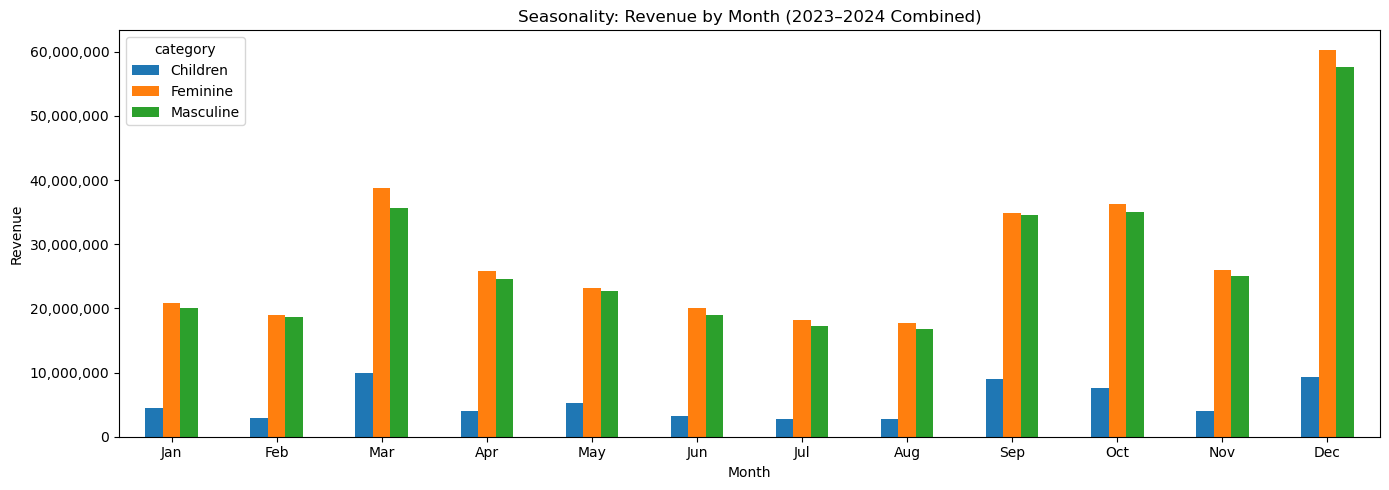

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# df must be a pandas DataFrame (after df = _.DataFrame())
df = df.copy()

# clean + ensure numeric
df["month_num"] = pd.to_numeric(df["month_num"], errors="coerce").astype("Int64")
df["sum_revenue"] = pd.to_numeric(df["sum_revenue"], errors="coerce")

# pivot using month_num (this guarantees correct order)
pivot_df = df.pivot_table(
    index="month_num",
    columns="category",
    values="sum_revenue",
    aggfunc="sum",
    observed=False
).reindex(range(1, 13)).fillna(0)

# replace x-axis labels with month names
month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
pivot_df.index = month_labels

ax = pivot_df.plot(kind="bar", figsize=(14,5))
ax.set_title("Seasonality: Revenue by Month (2023–2024 Combined)")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 2.Assess the age ranges most associated with each product to optimize product strategy and target the most promising market segments effectively.

## ANALYTICAL QUESTION QUERY 2

SELECT
Age group classification

Uses a CASE statement to assign each customer to an age group based on their age at the time of the transaction.

AGE(T.date, C.date_of_birth::date) calculates the customer’s age on the transaction date.

DATE_PART('year', …) extracts the age in years.

Age ranges are grouped into meaningful bands:

<18,18–24,25–34,35–44,45–54,55–60 AND 65+

The result is labeled as age_group.

Product sub-category

Selects the product sub-category to analyze detailed product-level purchasing patterns.

Number of transactions

COUNT(*) counts how many transactions occurred for each age group and sub-category combination.

Total revenue

SUM(T.line_total) calculates the total revenue generated by each age group for each sub-category.

FROM and JOIN

Customers table (C) provides customer demographics (date of birth).

Transactions table (T) provides purchase activity and transaction dates.

Products table (P) provides product sub-category information.

Joins ensure each transaction is linked to:

the correct customer (to determine age),

and the correct product (to determine sub-category).

WHERE

Filters out customers with missing dates of birth.

This ensures age calculations are valid and accurate.

GROUP BY

Groups results by:

calculated age group,

product sub-category.

This allows aggregation of transactions and revenue at the age-group × sub-category level.

ORDER BY

Sorts results by age group.

Within each age group, sorts sub-categories by total revenue in descending order, highlighting top-performing products for each age segment.

In [87]:
%%sql
SELECT
    CASE
        WHEN DATE_PART('year', AGE(T.date, C.date_of_birth::date)) < 18 THEN '<18'
        WHEN DATE_PART('year', AGE(T.date, C.date_of_birth::date)) BETWEEN 18 AND 24 THEN '18–24'
        WHEN DATE_PART('year', AGE(T.date, C.date_of_birth::date)) BETWEEN 25 AND 34 THEN '25–34'
        WHEN DATE_PART('year', AGE(T.date, C.date_of_birth::date)) BETWEEN 35 AND 44 THEN '35–44'
        WHEN DATE_PART('year', AGE(T.date, C.date_of_birth::date)) BETWEEN 45 AND 54 THEN '45–54'
        WHEN DATE_PART('year', AGE(T.date, C.date_of_birth::date)) BETWEEN 55 AND 64 THEN '55–64'
        ELSE '65+'
    END AS age_group,
    P.sub_category,
    COUNT(*)          AS number_of_transactions,
    SUM(T.line_total) AS total_revenue
FROM customers C
JOIN transactions T ON C.customer_id = T.customer_id
JOIN products P     ON T.product_id = P.product_id
WHERE C.date_of_birth IS NOT NULL
GROUP BY age_group, P.sub_category
ORDER BY age_group, total_revenue DESC;

Running query in 'postgresql://student@/week11'

147 rows affected.

age_group,sub_category,number_of_transactions,total_revenue
18–24,Coats and Blazers,221508,44406695.9
18–24,Pants and Jeans,227068,41318829.0
18–24,Suits and Blazers,111068,34154243.8
18–24,Sportswear,222690,29775554.2
18–24,Suits and Sets,99400,27897424.3
18–24,Dresses and Jumpsuits,120182,18622653.3
18–24,Sweaters and Sweatshirts,123328,16609479.1
18–24,Sweaters and Knitwear,110564,13816426.4
18–24,T-shirts and Polos,127159,13685444.3
18–24,Shirts and Blouses,116092,12105912.2


###### VISUALIZATION 

import pandas as pd

Imports the pandas library.

as pd creates a short alias so we can write pd instead of pandas.

if hasattr(_, "DataFrame"):

if starts a conditional check.

_ refers to the output of the previous cell in Jupyter.

hasattr(object, "DataFrame") checks whether _ has a method called DataFrame.

This is used to determine what type of object _ is.

df = _.DataFrame()

Runs only if _ is a SQL ResultSet (from %%sql).

.DataFrame() converts the SQL query result into a pandas DataFrame.

The result is stored in df.

else:

Executes if _ does not have a DataFrame method.

This means _ is already a pandas DataFrame.

df = _

Assigns _ directly to df without conversion.

Prevents unnecessary re-processing and avoids errors.

df.head()

Displays the first 5 rows of the DataFrame.

Used to confirm:

the data loaded correctly,

column names,

and example values.

   #### for the other codes after importing pd as pandas 

An ordered list of age groups is defined so age bands appear in a logical sequence rather than alphabetical order.

The dataframe’s actual column names are checked to ensure the pivot uses the correct fields.

The data is reshaped into a pivot table, summarizing total revenue by age group (rows) and product sub-category (columns).

Missing age–subcategory combinations are filled with zero so the heatmap has a complete grid.

All values are forced to numeric to prevent plotting errors.

A heatmap is created to visualize how revenue varies across age groups and product sub-categories.

The chart is formatted with clear labels, a title, readable axis text, and a color bar to show revenue intensity.

In [88]:
import pandas as pd

if hasattr(_, "DataFrame"):
    df = _.DataFrame()   # SQL ResultSet → pandas
else:
    df = _               # already pandas

df.head()



,age_group,sub_category,number_of_transactions,total_revenue
0,18–24,Coats and Blazers,221508,44406695.9
1,18–24,Pants and Jeans,227068,41318829.0
2,18–24,Suits and Blazers,111068,34154243.8
3,18–24,Sportswear,222690,29775554.2
4,18–24,Suits and Sets,99400,27897424.3


In [89]:

age_order = [
    "<18",
    "18–24",
    "25–34",
    "35–44",
    "45–54",
    "55–64",
    "65+"
]



In [90]:
print(df.columns.tolist())


['age_group', 'sub_category', 'number_of_transactions', 'total_revenue']


In [91]:
pivot_df = pivot_df.reindex(age_order)


In [92]:
pivot_df = df.pivot_table(
    values="total_revenue",
    index="age_group",
    columns="sub_category",   
    aggfunc="sum"
).fillna(0)


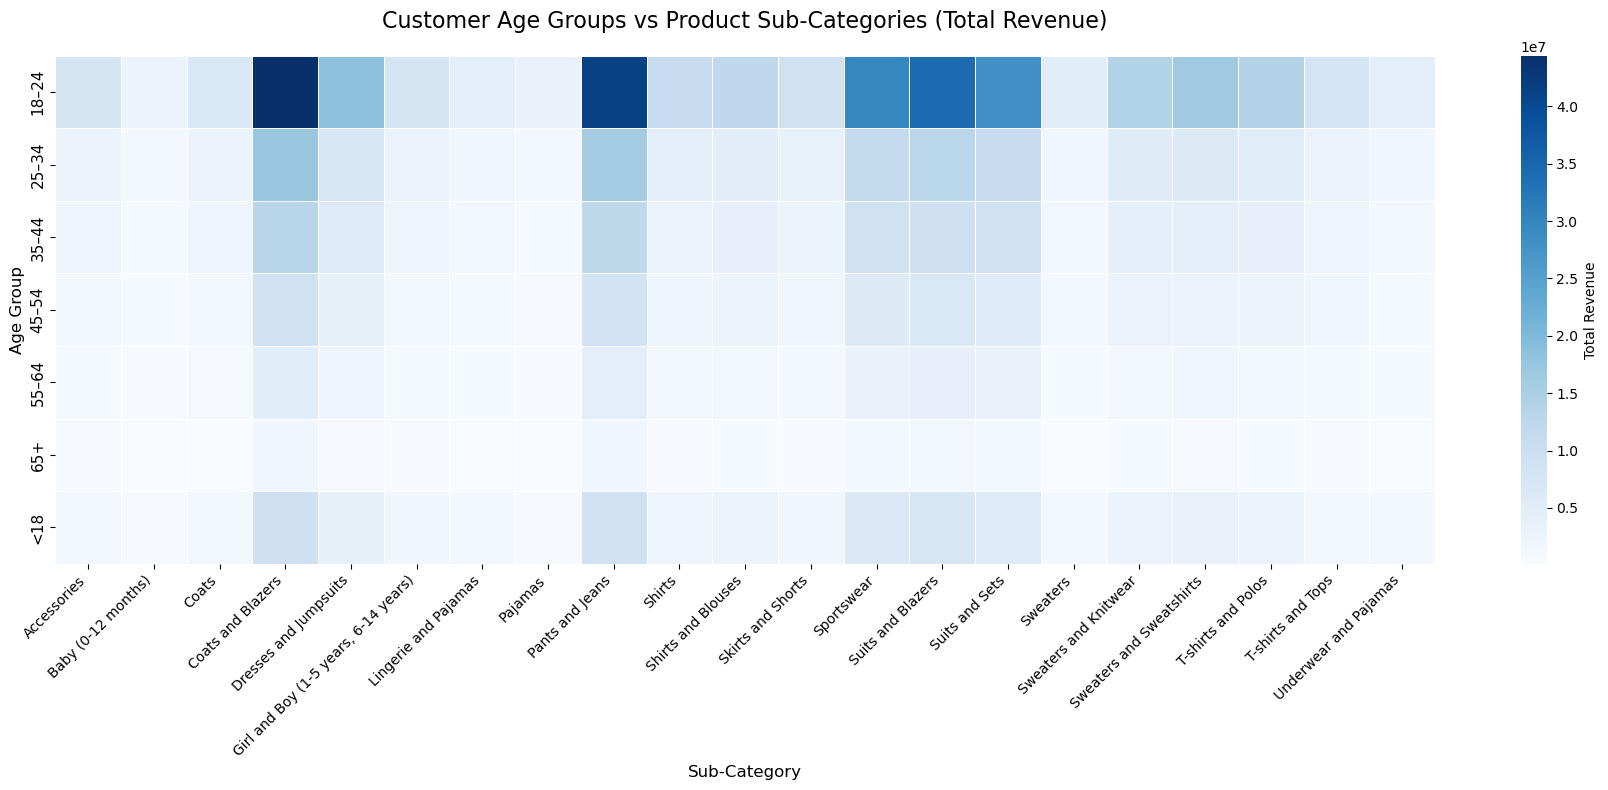

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the actual column names from your df
pivot_df = df.pivot_table(
    values="total_revenue",
    index="age_group",
    columns="sub_category",
    aggfunc="sum"
).fillna(0)

# Ensure numeric (just in case)
pivot_df = pivot_df.apply(pd.to_numeric, errors="coerce").fillna(0)

plt.figure(figsize=(18, 8))
sns.heatmap(
    pivot_df,
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"label": "Total Revenue"},
    annot=False,
    fmt=".0f"
)

plt.title("Customer Age Groups vs Product Sub-Categories (Total Revenue)", fontsize=16, pad=20)
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


## 3.Which countries and cities generate the highest and lowest sales, and where should we strengthen or optimize locations and directions to maximize revenue?

## What this code does:
1. SELECT — what columns you want in your output
* s.store_id - which store made the sales 
* s.country - country where the store is 
* s.city - city where the store is 
* p.category - product category 
* SUM(t.invoice_total) - total money made 
* COUNT(*) - number of transactions 
This gives store-level sales by product category. 

### 2. FROM & JOIN — linking tables together
### Data comes from 3 tables: 
#### FROM Transactions t This is the main table with: 
each transaction; date; invoice_total; product_id; store_id 
#### JOIN Stores s ON t.store_id = s.store_id This attaches store details (country, city) to each transaction. 
#### JOIN Products p ON t.product_id = p.product_id This attaches product details (category, subcategory, etc.) to each transaction. 
#### These joins combine all needed information into one dataset

### 3. GROUP BY — how the results are summarized
GROUP BY
    s.store_id,
    s.country,
    s.city,
    p.category
This means: For each store in each city/country AND each product category, calculate: * total sales * number of transactions It produces one row per store and category.

### 4. ORDER BY — sorting the results
ORDER BY total_sales DESC
This sorts the output from highest sales to lowest sales. So the top rows show: the strongest stores in the strongest countries/cities with the highest-selling product categories

In [ ]:
import psycopg2

In [94]:
%%sql
SELECT
    s.store_id,
    s.country,
    s.city,
    p.category,                  
    SUM(t.invoice_total) AS total_sales,
    COUNT(*) AS transaction_count
FROM Transactions t
JOIN Stores s
    ON t.store_id = s.store_id
JOIN Products p
    ON t.product_id = p.product_id
GROUP BY
    s.store_id,
    s.country,
    s.city,
    p.category
ORDER BY
    total_sales DESC;

Running query in 'postgresql://student@/week11'

105 rows affected.

store_id,country,city,category,total_sales,transaction_count
6,China,Shanghai,Masculine,127133269.65,167783
6,China,Shanghai,Feminine,125020086.21,168144
8,China,广州,Masculine,124110382.28,161995
8,China,广州,Feminine,122294983.52,162416
9,China,深圳,Masculine,103844236.11,137717
9,China,深圳,Feminine,102548059.41,137949
7,China,Beijing,Masculine,94984682.04,124927
7,China,Beijing,Feminine,94187301.17,125782
10,China,重庆,Masculine,67045972.84,87418
10,China,重庆,Feminine,65717463.42,87139


#### The output shows the highest-selling stores by country,city and category. The most performing stores are all in China simply because China dominates sales performance in our dataset. This helps the business understand where money is coming from, which stores deserve more investment, and how to allocate products and resources for maximum profit.

In [100]:
# Connect to database
conn = psycopg2.connect("postgresql://student@/week11")

sql_query3 = """
SELECT
    s.store_id,
    s.country,
    s.city,
    p.category,                  
    SUM(t.invoice_total) AS total_sales,
    COUNT(*) AS transaction_count
FROM Transactions t
JOIN Stores s
    ON t.store_id = s.store_id
JOIN Products p
    ON t.product_id = p.product_id
GROUP BY
    s.store_id,
    s.country,
    s.city,
    p.category
ORDER BY
    total_sales DESC;
"""

df3 = pd.read_sql_query(sql_query3, conn)
conn.close()

df3


/tmp/ipykernel_1795/2814911677.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(sql_query3, conn)


,store_id,country,city,category,total_sales,transaction_count
0,6,China,Shanghai,Masculine,1.271333e+08,167783
1,6,China,Shanghai,Feminine,1.250201e+08,168144
2,8,China,广州,Masculine,1.241104e+08,161995
3,8,China,广州,Feminine,1.222950e+08,162416
4,9,China,深圳,Masculine,1.038442e+08,137717
...,...,...,...,...,...,...
100,15,Deutschland,Frankfurt am Main,Children,6.883683e+05,9558
101,28,España,Valencia,Children,6.552382e+05,8744
102,33,Portugal,Braga,Children,6.159049e+05,8384
103,19,United Kingdom,Liverpool,Children,5.714550e+05,10805


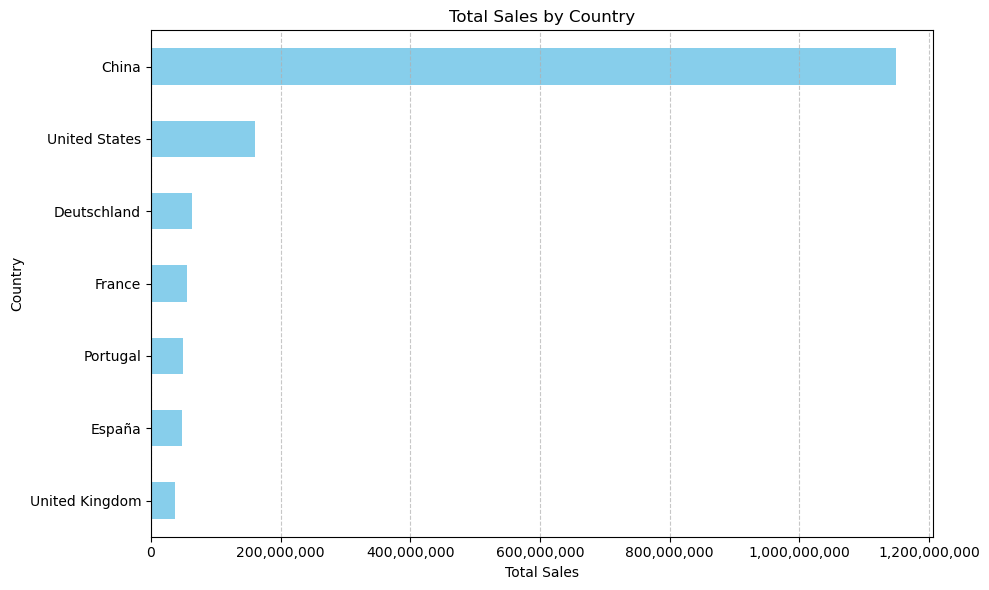

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate total_sales by country
country_sales = df3.groupby('country')['total_sales'].sum().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
country_sales.plot(kind='barh', color='skyblue')

# Format x-axis to show absolute values with commas
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Total Sales by Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1795/2348642354.py:33: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1795/2348642354.py:33: UserWarning: Glyph 24198 (\N{CJK UNIFIED IDEOGRAPH-5E86}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1795/2348642354.py:33: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1795/2348642354.py:33: UserWarning: Glyph 22323 (\N{CJK UNIFIED IDEOGRAPH-5733}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1795/2348642354.py:33: UserWarning: Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1795/2348642354.py:33: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
  plt.tight_layout()
/home/ubuntu/.python3-venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRA

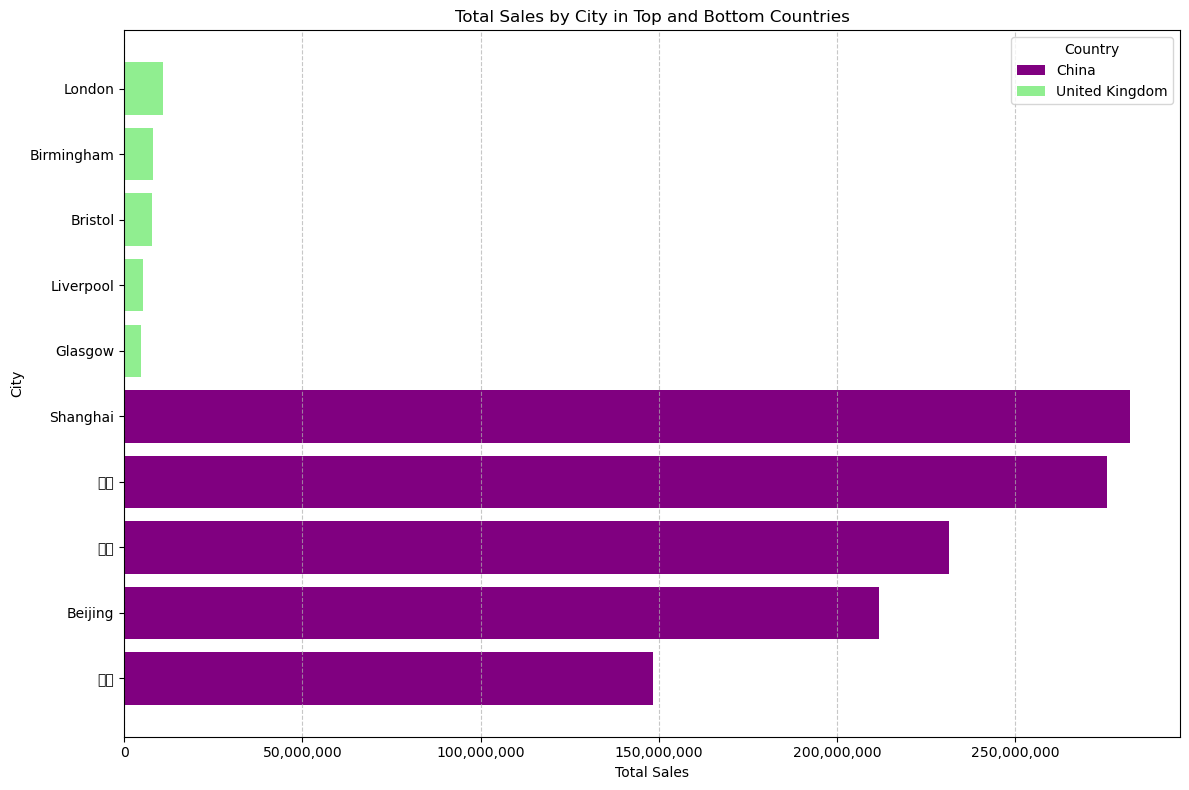

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Aggregate total sales by country
country_sales = df3.groupby('country')['total_sales'].sum()

# Step 2: Find countries with max and min total sales
max_country = country_sales.idxmax()  # e.g., China
min_country = country_sales.idxmin()  # e.g., United Kingdom

# Step 3: Filter for these countries
filtered_df = df3[df3['country'].isin([max_country, min_country])]

# Step 4: Aggregate total_sales by city within these countries
city_sales = filtered_df.groupby(['country', 'city'])['total_sales'].sum().sort_values()

# Step 5: Plot with different colors per country
colors = {max_country: 'purple', min_country: 'lightgreen'}

plt.figure(figsize=(12, 8))
for country in [max_country, min_country]:
    cities = city_sales[country].sort_values()
    plt.barh(cities.index, cities.values, color=colors[country], label=country)

# Format x-axis to show absolute values
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Total Sales by City in Top and Bottom Countries')
plt.legend(title='Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4.Which product categories (Feminine, Masculine, Children) perform best in each country over the years and which subcategories can we shift more resources to for us to increase the sales overtime

1.SELECT — what columns you want in your output

We are selecting:
country - which country the sales came from
year - which year the sales happened
category - Feminine, Masculine, or Children
sub_category - the specific product type
total_sales - total money made by that subcategory in that country and year

2.FROM & JOIN — linking tables together

This data comes from 2 tables:

a) FROM Transactions t

Main table containing:
- each transaction
- invoice amount (invoice_total)
- date
- product_id

b) JOIN Products p ON t.product_id = p.product_id

Adds product information:
- category
- sub_category

These joins give a dataset that includes product details and sales amounts, aggregated across all stores (no country dimension).

3.GROUP BY

For each year, category, and sub_category, we calculate:
- total_sales = SUM(invoice_total)

The query produces one row per year–category–subcategory.

4.RANK() — ranking the results
- RANK() assigns a rank to each subcategory within a year based on total_sales (highest sales = rank 1).
- If two subcategories have the same total_sales, they share the same rank (unlike ROW_NUMBER, which forces a unique order).

5.(Optional) WHERE — filter to top subcategory
- You could add WHERE sales_rank = 1 to keep only the top-selling subcategory per year.
- Currently, the query returns all subcategories ranked, which allows you to see 2nd, 3rd, etc., as well.

6. ORDER BY — sorting the results
- Sorted first by year (2023, 2024, 2025)
- Within each year, sorted by sales_rank (highest sales first)

#### This code calculates and groups total sales for each subcategory by category for the whole period of time

In [108]:
%%sql
WITH yearly_sales AS (
    SELECT
        EXTRACT(YEAR FROM t.date) AS year,
        p.category,
        p.sub_category,
        SUM(t.invoice_total) AS total_sales
    FROM Transactions t
    JOIN Products p
        ON t.product_id = p.product_id
    GROUP BY
        EXTRACT(YEAR FROM t.date),
        p.category,
        p.sub_category
)
SELECT
    year,
    category,
    sub_category,
    total_sales,
    RANK() OVER (
        PARTITION BY year
        ORDER BY total_sales DESC
    ) AS sales_rank
FROM yearly_sales
ORDER BY year, sales_rank;


Running query in 'postgresql://student@/week11'

78 rows affected.

year,category,sub_category,total_sales,sales_rank
2023,Masculine,Suits and Blazers,48313450.32,1
2023,Masculine,Pants and Jeans,41771423.41,2
2023,Feminine,Suits and Sets,41455650.35,3
2023,Masculine,Coats and Blazers,39555836.15,4
2023,Feminine,Dresses and Jumpsuits,35271777.00,5
2023,Feminine,Coats and Blazers,34463581.05,6
2023,Masculine,Sweaters and Sweatshirts,34117909.82,7
2023,Masculine,Sportswear,33474559.04,8
2023,Feminine,Pants and Jeans,32161810.48,9
2023,Masculine,T-shirts and Polos,32046416.03,10


In [110]:
# Connect to database
conn = psycopg2.connect("postgresql://student@/week11")

sql_query = """
WITH yearly_sales AS (
    SELECT
        EXTRACT(YEAR FROM t.date) AS year,
        p.category,
        p.sub_category,
        SUM(t.invoice_total) AS total_sales
    FROM Transactions t
    JOIN Products p
        ON t.product_id = p.product_id
    GROUP BY
        EXTRACT(YEAR FROM t.date),
        p.category,
        p.sub_category
)
SELECT
    year,
    category,
    sub_category,
    total_sales,
    RANK() OVER (
        PARTITION BY year
        ORDER BY total_sales DESC
    ) AS sales_rank
FROM yearly_sales
ORDER BY year, sales_rank;
"""

df = pd.read_sql_query(sql_query, conn)
conn.close()

df


/tmp/ipykernel_1795/2697301546.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


,year,category,sub_category,total_sales,sales_rank
0,2023.0,Masculine,Suits and Blazers,48313450.32,1
1,2023.0,Masculine,Pants and Jeans,41771423.41,2
2,2023.0,Feminine,Suits and Sets,41455650.35,3
3,2023.0,Masculine,Coats and Blazers,39555836.15,4
4,2023.0,Feminine,Dresses and Jumpsuits,35271777.00,5
...,...,...,...,...,...
73,2025.0,Feminine,Accessories,1511534.95,22
74,2025.0,Masculine,Accessories,1503903.33,23
75,2025.0,Children,Pajamas,1211004.59,24
76,2025.0,Children,Baby (0-12 months),1185130.98,25


In [115]:
df["year"] = df["year"].astype(int)
df

,year,category,sub_category,total_sales,sales_rank
0,2023,Masculine,Suits and Blazers,48313450.32,1
1,2023,Masculine,Pants and Jeans,41771423.41,2
2,2023,Feminine,Suits and Sets,41455650.35,3
3,2023,Masculine,Coats and Blazers,39555836.15,4
4,2023,Feminine,Dresses and Jumpsuits,35271777.00,5
...,...,...,...,...,...
73,2025,Feminine,Accessories,1511534.95,22
74,2025,Masculine,Accessories,1503903.33,23
75,2025,Children,Pajamas,1211004.59,24
76,2025,Children,Baby (0-12 months),1185130.98,25


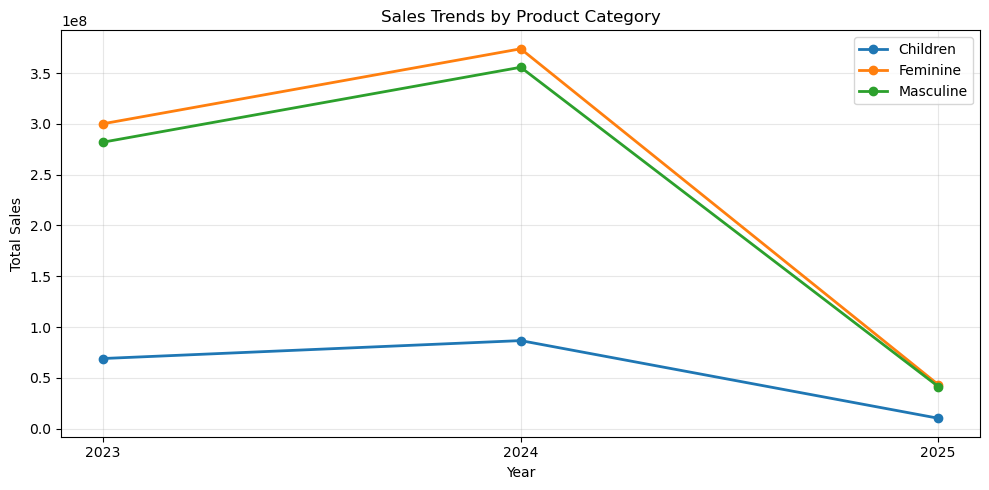

In [119]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Aggregate category sales per year
category_trend = (
    df.groupby(["year", "category"])["total_sales"]
      .sum()
      .reset_index()
)

# Set 'year' as integer
category_trend["year"] = category_trend["year"].astype(int)

plt.figure(figsize=(10, 5))

for cat in category_trend["category"].unique():
    d = category_trend[category_trend["category"] == cat]
    plt.plot(d["year"], d["total_sales"], marker="o", linewidth=2, label=cat)

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Trends by Product Category")
plt.legend()
plt.grid(True, alpha=0.3)

# Force X-axis to show only integer years
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


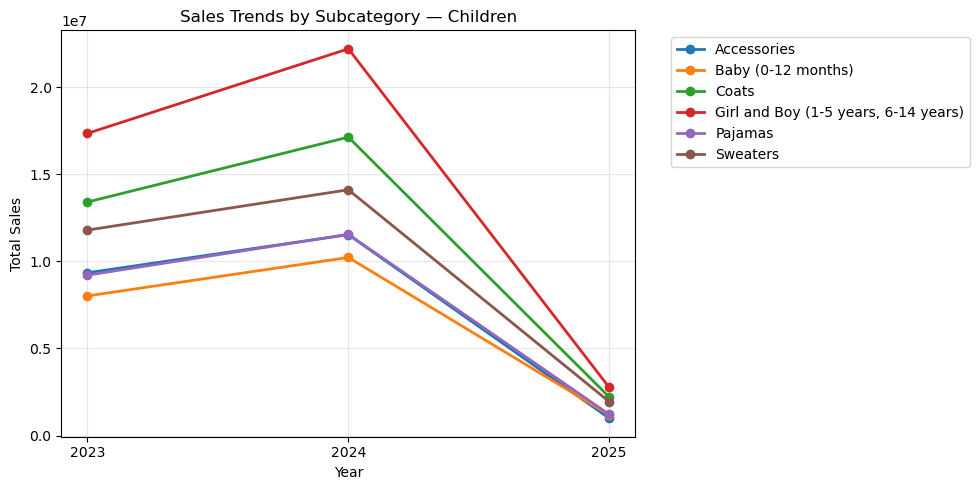

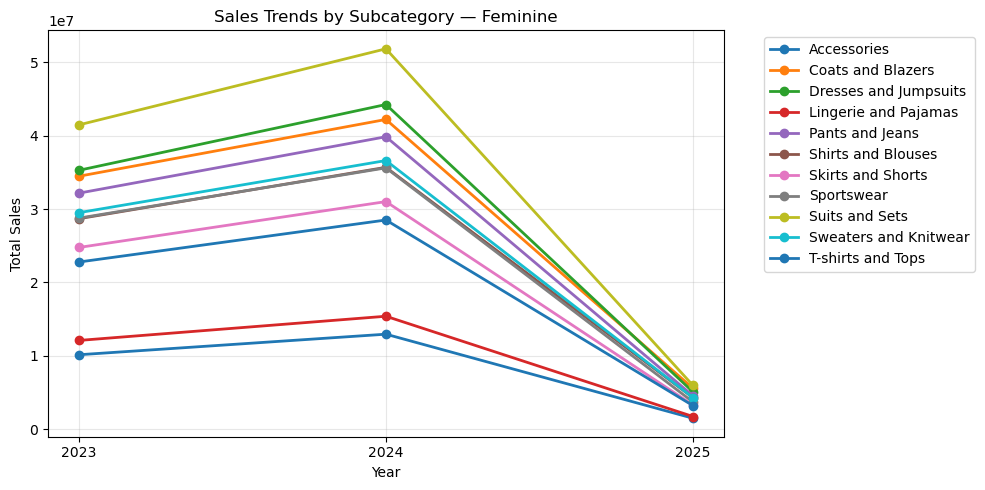

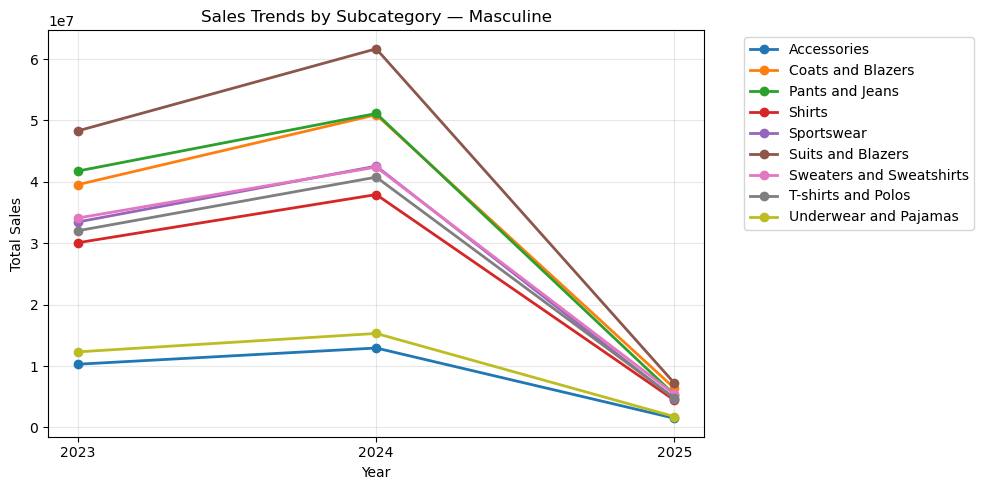

In [121]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

# Step 1: Aggregate subcategory sales per year
subcategory_trend = (
    df.groupby(["year", "category", "sub_category"])["total_sales"]
      .sum()
      .reset_index()
)

# Step 2: Ensure 'year' is integer
subcategory_trend["year"] = subcategory_trend["year"].astype(int)

# Step 3: Plot
for cat in subcategory_trend["category"].unique():
    cat_data = subcategory_trend[subcategory_trend["category"] == cat]

    plt.figure(figsize=(10, 5))

    for subcat in cat_data["sub_category"].unique():
        d = cat_data[cat_data["sub_category"] == subcat]
        plt.plot(d["year"], d["total_sales"], marker="o", linewidth=2, label=subcat)

    plt.xlabel("Year")
    plt.ylabel("Total Sales")
    plt.title(f"Sales Trends by Subcategory — {cat}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)

    # Force X-axis to show only integer years
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()
